## CAPSTONE 2 : New York City Trip Record Data ##

New York City Taxi and Limousine Commission (TLC) adalah lembaga pemerintah kota New York yang bertanggung jawab atas lisensi dan regulasi semua layanan transportasi taksi dan kendaraan sewaan (seperti Uber dan Lyft) di kota tersebut

Tugas Utama TLC : 
1. Mengatur tarif dan standar layanan taksi
2. Mengeluarkan dan mengelola lisensi pengemudi dan kendaraan
3. Menetapkan kebijakan keselamatan dan lingkungan
4. Menyediakan data publik seperti TLC Trip Record Data

Dataset ini disediakan oleh New York City Taxi and Limousine Commission (TLC) dan berisi data perjalanan taksi (termasuk taksi kuning, hijau, dan layanan ride-hailing seperti Uber dan Lyft) di New York City.

NYC TLC (Taxi and Limousine Commission) Trip Record Data adalah kumpulan data besar yang mencatat perjalanan taksi dan kendaraan sewaan (FHV - For-Hire Vehicles) di New York City. Data ini mencakup:

1. Jenis kendaraan: Taksi kuning, taksi hijau, dan FHV (seperti Uber dan Lyft)
2. Waktu dan lokasi: Waktu penjemputan dan penurunan, serta zona lokasi
3. Detail perjalanan: Jarak tempuh, durasi, jumlah penumpang
4. Informasi tarif: Tarif dasar, pajak, tip, tol, dan total biaya
5. Metode pembayaran: Tunai, kartu kredit, dll.

Analisa data :

1. Distribusi Jenis Pembayaran
Tujuan: Menunjukkan tren penggunaan metode pembayaran (tunai, kartu, no charge, dll).
Manfaat: Membantu TLC memahami preferensi penumpang dan potensi kebijakan non-tunai.

2. Pola Waktu Perjalanan
Tujuan: Visualisasi jumlah perjalanan berdasarkan jam, hari, atau bulan.
Manfaat: Mengidentifikasi jam sibuk, tren musiman, dan kebutuhan armada.

3. Peta Panas Lokasi Penjemputan dan Pengantaran
Tujuan: Menampilkan zona dengan aktivitas tertinggi.
Manfaat: Mendukung perencanaan zona layanan dan pengawasan distribusi kendaraan.

4. Analisis RatecodeID dan trip_type
Tujuan: Menilai proporsi tarif tetap (JFK, Newark) dan jenis perjalanan (street-hail vs dispatch).
Manfaat: Menilai efektivitas kebijakan tarif dan layanan aplikasi.

5. Rata-rata Tarif dan Tip
Tujuan: Menampilkan tren tarif dasar, total biaya, dan tip.
Manfaat: Menilai dampak ekonomi terhadap pengemudi dan penumpang.


<b>Novianto Chris<b>


In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data from csv file NYC TLC Trip Records.csv
df = pd.read_csv('NYC TLC Trip Record.csv')
# buat kolom indeks baru dengan nama 'index'
df['index'] = np.arange(len(df))
# reset index to default integer index
df.reset_index(drop=True, inplace=True)
# set kolom 'index' sebagai indeks dataframe
df.set_index('index', inplace=True)
# jadikan kolom index sebagai kolom biasa
df.reset_index(inplace=True)
# print first 5 rows of the dataframe
df.head()

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_3208/2872219795.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC TLC Trip Record.csv')


,index,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,...,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,...,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,...,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,...,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,...,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


Column Dictionary :

1. VendorID = A code indicating the LPEP provider that provided the record. 1 = Creative Mobile T echnologies, LLC. 2 = VeriFone Inc.
2. lpep_pickup_datetime = The date and time when the meter was engaged.
3. lpep_dropoff_datetime = The date and time when the meter was disengaged.
4. passenger_count = The number of passengers in the vehicle. This is a driver-entered value.
5. trip_distance = The elapsed trip distance in miles reported by the taximeter.
6. PULocationID = A numeric code that represents the TLC-defined location where the taxicab trip began or TLC Taxi Zone in which the taximeter was engaged.
7. DOLocationID = A numeric code that represents the TLC-defined location where the taxicab trip ended or TLC Taxi Zone in which the taximeter was disengaged.
8. RateCodeID = The final rate code is in effect at the end of the trip. 1 = Standard rate. 2 = JFK. 3 = Newark. 4 = Nassau Or Westchester. 5 = Negotiate fare. 6 = Group Ride.
9. store_and_fwd_flag = This flag is set to Y when the cab driver stores a trip record and later uploads it to the server. This can happen when the driver does not have a data connection at the time of the trip.
10. payment_type = A numeric code indicating how the passenger paid for the trip. 1 = Credit card. 2 = Cash. 3 = No charge. 4 = Dispute. 5 = Unknown. 6 = Voided trip.
11. Fare_amount = The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rushhour and overnight charges.
12. MTA_tax = $0.50 MTA tax that is automatically triggered based on the metered rate in use.
13. Improvement_surcharge = $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being In 2015.
14. Tip_amount = This field is automatically populated for credit card tips. Cash tips are not included.
15. Tolls_amount = The total amount of all tolls paid in the trip.
16. Total_amount = The total amount charged to passengers. Does not include cash tips.
17. Trip_type = A numeric code indicating the type of trip. 1 = Street-hail. 2 = Dispatch.


In [3]:
#give info the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  68211 non-null  int64  
 1   VendorID               68211 non-null  int64  
 2   lpep_pickup_datetime   68211 non-null  object 
 3   lpep_dropoff_datetime  68211 non-null  object 
 4   store_and_fwd_flag     63887 non-null  object 
 5   RatecodeID             63887 non-null  float64
 6   PULocationID           68211 non-null  int64  
 7   DOLocationID           68211 non-null  int64  
 8   passenger_count        63887 non-null  float64
 9   trip_distance          68211 non-null  float64
 10  fare_amount            68211 non-null  float64
 11  extra                  68211 non-null  float64
 12  mta_tax                68211 non-null  float64
 13  tip_amount             68211 non-null  float64
 14  tolls_amount           68211 non-null  float64
 15  eh

In [4]:
# describe the dataframe
df.describe()

,index,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,34105.000000,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,19690.963943,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,17052.500000,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,34105.000000,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,51157.500000,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,68210.000000,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


In [5]:
# Cleaning the data
# give info missing values
df.isnull().sum()

index                        0
VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [6]:
# analisa data dari df 
# copy frame df ke df2
df2 = df.copy()


In [7]:
# buat kolom baru 'trip_duration' dengan selisih waktu antara lpep_dropoff_datetime dan lpep_pickup_datetime
df2['lpep_pickup_datetime'] = pd.to_datetime(df2['lpep_pickup_datetime'])
df2['lpep_dropoff_datetime'] = pd.to_datetime(df2['lpep_dropoff_datetime'])
df2['trip_duration'] = (df2['lpep_dropoff_datetime'] - df2['lpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes
# pindahakan kolom 'trip_duration' ke posisi keempat
df2.head()

,index,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,...,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,11.016667
1,1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,...,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,6.766667
2,2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,...,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00,6.333333
3,3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,...,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,5.816667
4,4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,...,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,5.966667


In [8]:
# buat kolom baru payment_type_name
payment_type_mapping = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}
df2['payment_type_name'] = df2['payment_type'].map(payment_type_mapping)
df2.head()
df2.tail()

,index,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,payment_type_name
68206,68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,...,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN,13.0,NaN
68207,68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,...,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN,8.0,NaN
68208,68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,...,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN,16.0,NaN
68209,68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,...,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN,18.0,NaN
68210,68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,...,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN,16.0,NaN


In [9]:
# buat kolom baru untuk trip_type_name
# buat fungsi untuk meghindari error InvalidIndexError. 
trip_type_mapping = {
    1: 'Street-hail',
    2: 'Dispatch'
}
df2['trip_type_name'] = df2['trip_type'].map(trip_type_mapping)
df2.head()

,index,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,payment_type_name,trip_type_name
0,0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,...,0.0,NaN,1.0,24.18,1.0,1.0,2.75,11.016667,Credit card,Street-hail
1,1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,...,0.0,NaN,1.0,15.84,1.0,1.0,0.00,6.766667,Credit card,Street-hail
2,2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,...,0.0,NaN,1.0,11.64,1.0,1.0,0.00,6.333333,Credit card,Street-hail
3,3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,...,0.0,NaN,1.0,10.20,1.0,1.0,0.00,5.816667,Credit card,Street-hail
4,4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,...,0.0,NaN,1.0,8.00,1.0,1.0,0.00,5.966667,Credit card,Street-hail


In [10]:
# buat kolom baru untuk RatecodeID_name
rate_code_mapping = {
    1: 'Standard rate',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau Or Westchester',
    5: 'Negotiate fare',
    6: 'Group Ride'
}
df2['RateCodeID_name'] = df2['RatecodeID'].map(rate_code_mapping)
df2.head()

,index,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,payment_type_name,trip_type_name,RateCodeID_name
0,0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,...,NaN,1.0,24.18,1.0,1.0,2.75,11.016667,Credit card,Street-hail,Standard rate
1,1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,...,NaN,1.0,15.84,1.0,1.0,0.00,6.766667,Credit card,Street-hail,Standard rate
2,2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,...,NaN,1.0,11.64,1.0,1.0,0.00,6.333333,Credit card,Street-hail,Standard rate
3,3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,...,NaN,1.0,10.20,1.0,1.0,0.00,5.816667,Credit card,Street-hail,Standard rate
4,4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,...,NaN,1.0,8.00,1.0,1.0,0.00,5.966667,Credit card,Street-hail,Standard rate


In [11]:
#check miissing values again
df2.isnull().sum()

index                        0
VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
trip_duration                0
payment_type_name         4324
trip_type_name            4334
RateCodeID_name           4334
dtype: int64

In [12]:
# ubah data pada kolom 'payment_type_name' menjadi 'Unknown' jika ada nilai yang tidak ada pada kamus
df2['payment_type_name'].fillna('Unknown', inplace=True)
# ubah data pada kolom 'trip_type_name' menjadi 'Unknown' jika ada nilai yang tidak ada pada kamus
df2['trip_type_name'].fillna('Unknown', inplace=True)
# ubah data pada kolom 'RateCodeID_name' menjadi 'Unknown' jika ada nilai yang tidak ada pada kamus
df2['RateCodeID_name'].fillna('Unknown', inplace=True)
# check again missing values
df2.isnull().sum()

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_3208/1535353710.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['payment_type_name'].fillna('Unknown', inplace=True)
/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_3208/1535353710.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

index                        0
VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
trip_duration                0
payment_type_name            0
trip_type_name               0
RateCodeID_name              0
dtype: int64

In [13]:
# Check for duplicate rows
duplicate_rows = df2.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [14]:
# karena passenger_count tidak terdistribusi normal, ubah nilai yang null, NaN atau kosong menggunakan median
df2['passenger_count'].fillna(df2['passenger_count'].median(), inplace=True)
# check again kolom passenger_count
df2['passenger_count'].describe()


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_3208/3141620436.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['passenger_count'].fillna(df2['passenger_count'].median(), inplace=True)


count    68211.000000
mean         1.295847
std          0.950635
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: passenger_count, dtype: float64

In [15]:
# ubah kolom store_and_fwd_flag data yang null,nan atau kosong menggunakan modus
df2['store_and_fwd_flag'].fillna(df2['store_and_fwd_flag'].mode()[0], inplace=True)
# check kolom store_and_fwd_flag
df2.isnull().sum()

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_3208/1081309693.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['store_and_fwd_flag'].fillna(df2['store_and_fwd_flag'].mode()[0], inplace=True)


index                        0
VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
trip_duration                0
payment_type_name            0
trip_type_name               0
RateCodeID_name              0
dtype: int64

In [16]:
# hapus kolom yang mempunyai missing values
df2.drop(columns=['RatecodeID', 'trip_type', 'ehail_fee','payment_type'], inplace=True)
df2.head()

,index,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,payment_type_name,trip_type_name,RateCodeID_name
0,0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,1.0,24.18,2.75,11.016667,Credit card,Street-hail,Standard rate
1,1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,1.0,15.84,0.00,6.766667,Credit card,Street-hail,Standard rate
2,2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,223,179,1.0,0.00,7.2,...,0.5,1.94,0.0,1.0,11.64,0.00,6.333333,Credit card,Street-hail,Standard rate
3,3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,1.0,10.20,0.00,5.816667,Credit card,Street-hail,Standard rate
4,4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,1.0,8.00,0.00,5.966667,Credit card,Street-hail,Standard rate


In [17]:
# load data zone dari file csv
df_zone = pd.read_csv('taxi_zone_lookup.csv')
# set kolom 'LocationID' sebagai indeks dataframe df_zone
df_zone.set_index('LocationID', inplace=True)   
df_zone.head()

,Borough,Zone,service_zone
LocationID,,,
1,EWR,Newark Airport,EWR
2,Queens,Jamaica Bay,Boro Zone
3,Bronx,Allerton/Pelham Gardens,Boro Zone
4,Manhattan,Alphabet City,Yellow Zone
5,Staten Island,Arden Heights,Boro Zone


In [18]:
# buat join antara df2 dan df_zone untuk mendapatkan nama lokasi pickup 
df2 = df2.join(df_zone[['Zone']], on='PULocationID', rsuffix='_pickup')

In [19]:
# ganti nama kolom 'Zone' menjadi 'Pickup_Zone'
df2.rename(columns={'Zone': 'Pickup_Zone'}, inplace=True)
# buat join antara df2 dan df_zone untuk mendapatkan nama lokasi dropoff
df2 = df2.join(df_zone[['Zone']], on='DOLocationID', rsuffix='_dropoff')


In [20]:
# ganti nama kolom 'Zone' menjadi 'Dropoff_Zone'
df2.rename(columns={'Zone': 'Dropoff_Zone'}, inplace=True)
# tampilkan 5 baris pertama dari df2    
df2.head()

,index,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,payment_type_name,trip_type_name,RateCodeID_name,Pickup_Zone,Dropoff_Zone
0,0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,166,143,1.0,2.58,14.9,...,0.0,1.0,24.18,2.75,11.016667,Credit card,Street-hail,Standard rate,Morningside Heights,Lincoln Square West
1,1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,24,43,1.0,1.81,10.7,...,0.0,1.0,15.84,0.00,6.766667,Credit card,Street-hail,Standard rate,Bloomingdale,Central Park
2,2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,223,179,1.0,0.00,7.2,...,0.0,1.0,11.64,0.00,6.333333,Credit card,Street-hail,Standard rate,Steinway,Old Astoria
3,3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,41,238,1.0,1.30,6.5,...,0.0,1.0,10.20,0.00,5.816667,Credit card,Street-hail,Standard rate,Central Harlem,Upper West Side North
4,4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,41,74,1.0,1.10,6.0,...,0.0,1.0,8.00,0.00,5.966667,Credit card,Street-hail,Standard rate,Central Harlem,East Harlem North


In [24]:
# import data to csv
df2.to_csv('NYC_TLC_Trip_Record_Cleaned3.csv', index=False)



In [ ]:
#Tunjukkan lokasi-lokasi populer penjemputan dan pengantaran. dalam bentuk visualisasi
# hitung jumlah trip per lokasi pickup
pickup_counts = df2['Pickup_Zone'].value_counts().reset_index()
pickup_counts.columns = ['Zone', 'Trip_Count']
pickup_counts

,Zone,Trip_Count
0,East Harlem North,13257
1,East Harlem South,9109
2,Central Harlem,4058
3,Morningside Heights,3879
4,Forest Hills,3839
...,...,...
219,Midtown Center,1
220,City Island,1
221,Lincoln Square West,1
222,East Chelsea,1


In [ ]:
dropoff_counts = df2['Dropoff_Zone'].value_counts().reset_index()
dropoff_counts.columns = ['Zone', 'Trip_Count']
dropoff_counts


,Zone,Trip_Count
0,East Harlem South,3524
1,East Harlem North,3394
2,Upper East Side North,2764
3,Central Harlem,2624
4,Central Harlem North,2341
...,...,...
242,Green-Wood Cemetery,1
243,Mariners Harbor,1
244,Pelham Bay Park,1
245,South Beach/Dongan Hills,1


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/1587205571.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trip_Count', y='Zone', data=pickup_counts.head(10), palette='viridis')


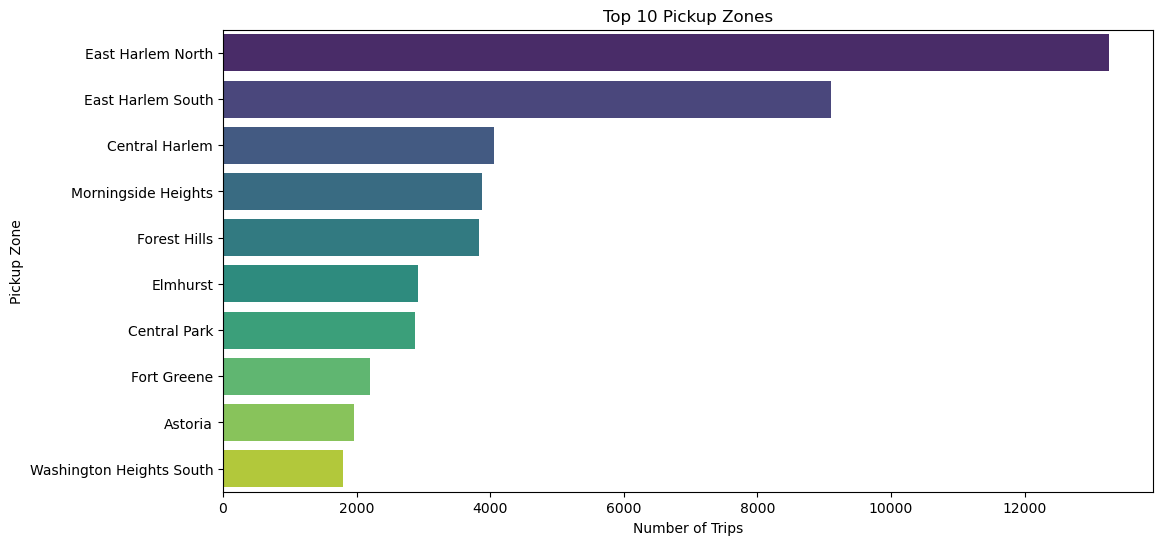

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/1587205571.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trip_Count', y='Zone', data=dropoff_counts.head(10), palette='viridis')


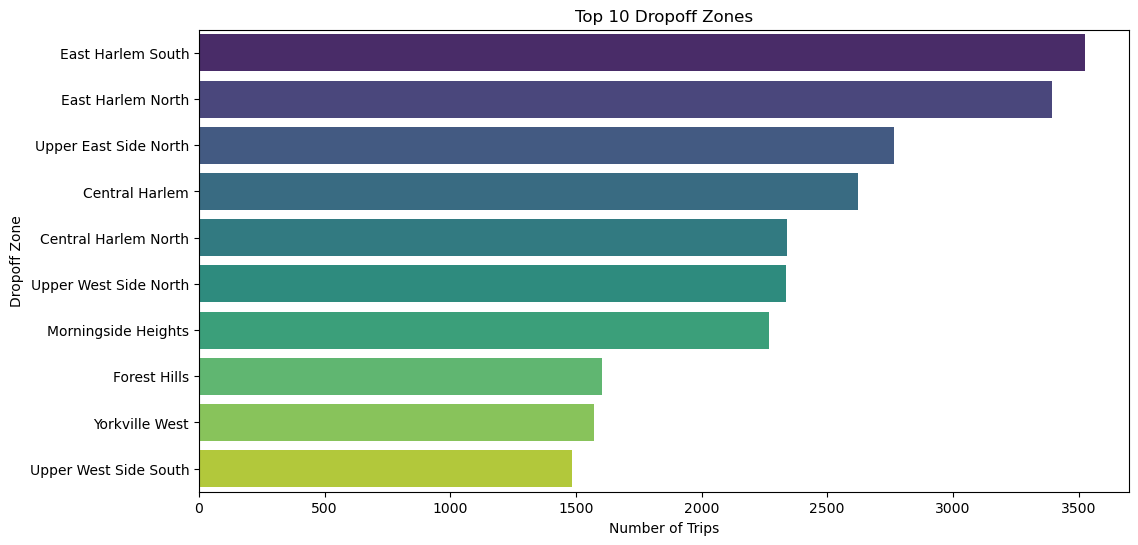

In [ ]:
#Tunjukkan lokasi-lokasi populer penjemputan dan pengantaran. dalam bentuk visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='Trip_Count', y='Zone', data=pickup_counts.head(10), palette='viridis')
plt.title('Top 10 Pickup Zones')
plt.xlabel('Number of Trips')
plt.ylabel('Pickup Zone')
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x='Trip_Count', y='Zone', data=dropoff_counts.head(10), palette='viridis')
plt.title('Top 10 Dropoff Zones')
plt.xlabel('Number of Trips')
plt.ylabel('Dropoff Zone')
plt.show()

<b>Penjelasan</b>

1. Lokasi penjemputan dan pengantaran yang paling populer adalah yang memiliki jumlah trip tertinggi.
2. Lokasi-lokasi ini mungkin merupakan area bisnis atau tempat wisata yang sering dikunjungi oleh penumpang.
3. Penumpang cenderung memilih lokasi-lokasi ini karena aksesibilitas dan kemudahan transportasi.


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/97646288.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Trip_Count', data=pickup_hour_counts, palette='viridis')


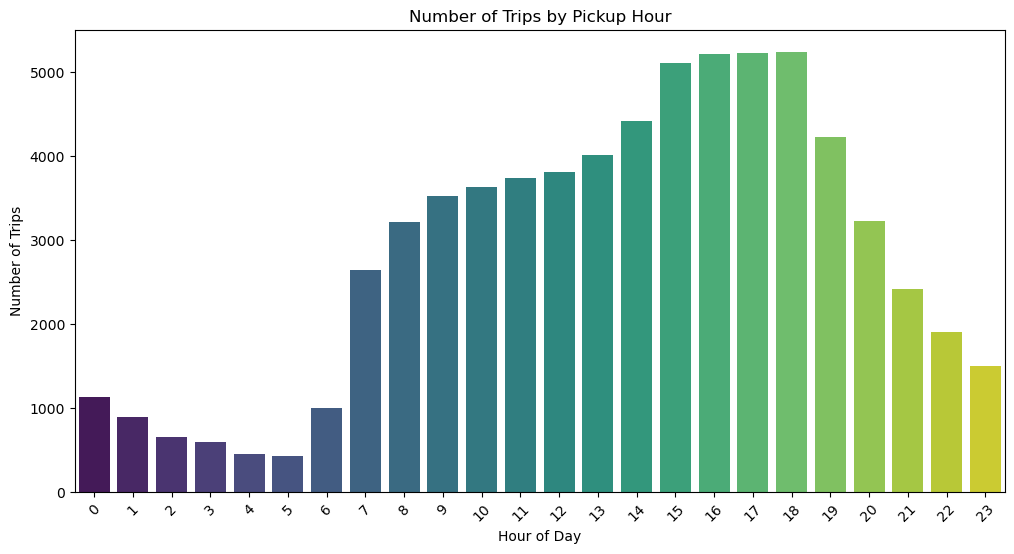

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/97646288.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Trip_Count', data=dropoff_hour_counts, palette='viridis')


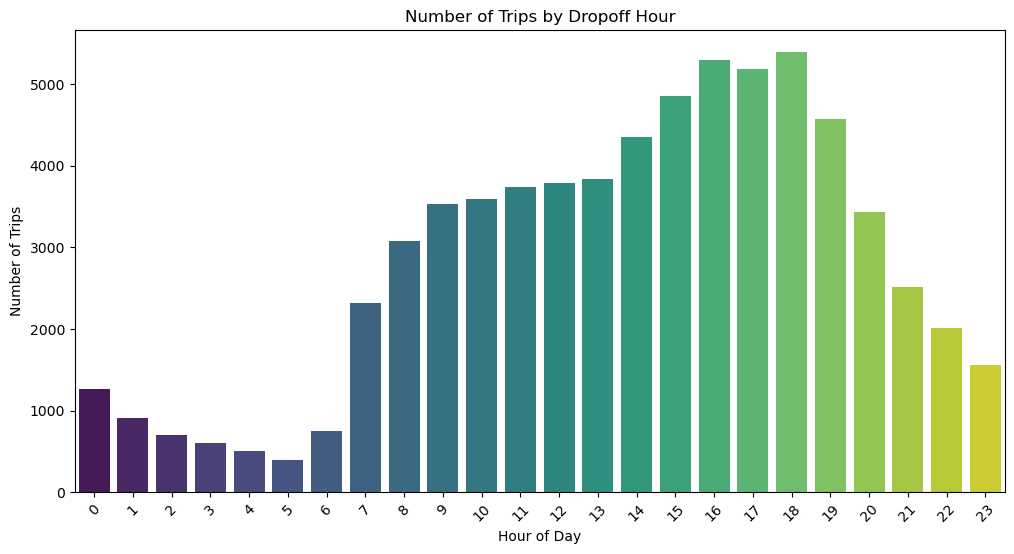

In [ ]:
#MTampilkan data jam berapa penjemputan dan pengantaran paling banyak 
# buat kolom baru 'pickup_hour' dan 'dropoff_hour' dari kolom 'lpep_pickup_datetime' dan 'lpep_dropoff_datetime'
df2['pickup_hour'] = df2['lpep_pickup_datetime'].dt.hour
df2['dropoff_hour'] = df2['lpep_dropoff_datetime'].dt.hour
# hitung jumlah trip per jam pickup
pickup_hour_counts = df2['pickup_hour'].value_counts().sort_index().reset_index()
pickup_hour_counts.columns = ['Hour', 'Trip_Count']
# hitung jumlah trip per jam dropoff
dropoff_hour_counts = df2['dropoff_hour'].value_counts().sort_index().reset_index()
dropoff_hour_counts.columns = ['Hour', 'Trip_Count']
# visualisasikan jumlah trip per jam pickup
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Trip_Count', data=pickup_hour_counts, palette='viridis')
plt.title('Number of Trips by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()
# visualisasikan jumlah trip per jam dropoff
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Trip_Count', data=dropoff_hour_counts, palette='viridis')
plt.title('Number of Trips by Dropoff Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

<b>Penjelasan</b>

1. Jam penjemputan dan pengantaran paling banyak terjadi pada jam-jam sibuk, seperti pagi hari (7-9) dan sore hari (16-18).
2. Hal ini menunjukkan bahwa penumpang cenderung menggunakan layanan taksi pada jam-jam tersebut, mungkin untuk pergi ke tempat kerja atau pulang ke rumah.
3. Penumpang juga menggunakan layanan taksi pada jam-jam lain, tetapi jumlahnya lebih sedikit dibandingkan dengan jam sibuk.
4. Penumpang mungkin memilih untuk menggunakan layanan taksi pada jam-jam tersebut karena alasan kenyamanan atau keterbatasan transportasi umum.
5. Data ini dapat digunakan untuk mengoptimalkan jadwal dan jumlah taksi yang tersedia pada jam-jam sibuk tersebut, sehingga dapat meningkatkan efisiensi layanan taksi.
6. Selain itu, data ini juga dapat digunakan untuk memahami pola perilaku penumpang dan mengidentifikasi tren penggunaan layanan taksi di kota New York.

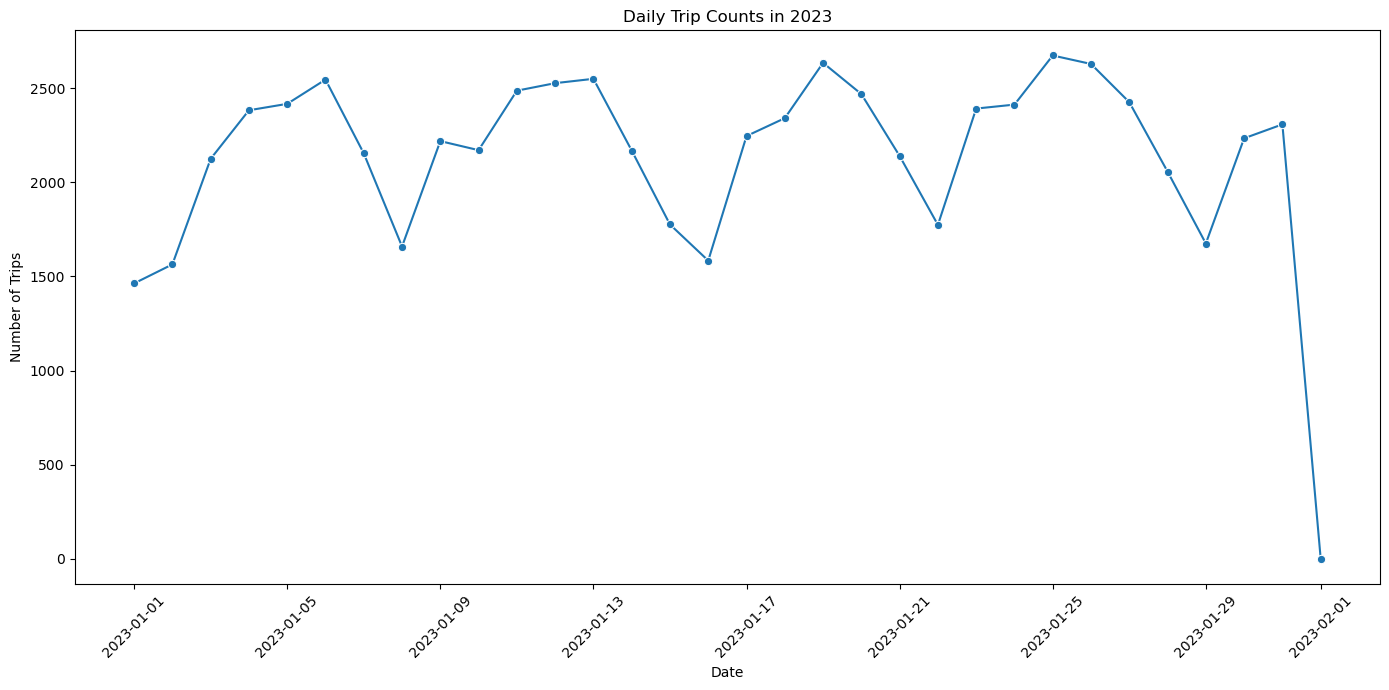

In [ ]:
 #filter data untuk trip di tahun 2023 saja
df2['year'] = df2['lpep_pickup_datetime'].dt.year
df2_2023 = df2[df2['year'] == 2023].copy()

df2_2023.head()
#tampilkan trend jumlah trip per hari di tahun 2023
daily_trip_counts = df2_2023.groupby(df2_2023['lpep_pickup_datetime'].dt.date).size().reset_index(name='Trip_Count')
plt.figure(figsize=(14, 7))
sns.lineplot(x='lpep_pickup_datetime', y='Trip_Count', data=daily_trip_counts, marker='o')
plt.title('Daily Trip Counts in 2023')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
# tampilkan data jumlah trip per hari di tahun 2023 secara keseluruhan
# tampilkan nama hari dari tanggal dataframe daily_trip_counts
daily_trip_counts['Day'] = pd.to_datetime(daily_trip_counts['lpep_pickup_datetime']).dt.day_name()

daily_trip_counts

,lpep_pickup_datetime,Trip_Count,Day
0,2023-01-01,1463,Sunday
1,2023-01-02,1564,Monday
2,2023-01-03,2125,Tuesday
3,2023-01-04,2383,Wednesday
4,2023-01-05,2417,Thursday
5,2023-01-06,2546,Friday
6,2023-01-07,2154,Saturday
7,2023-01-08,1659,Sunday
8,2023-01-09,2219,Monday
9,2023-01-10,2171,Tuesday


<b>Penjelasan</b>

1. Jumlah trip per hari di tahun 2023 menunjukkan fluktuasi yang signifikan, dengan beberapa hari memiliki jumlah trip yang sangat tinggi.
2. Hari-hari tertentu, seperti hari jumat memiliki jumlah trip yang lebih tinggi dibandingkan dengan hari lainnya, mungkin karena orang-orang cenderung bepergian lebih banyak pada akhir pekan.
3. Hari minggu cenderung memiliki jumlah trip yang lebih rendah, mungkin karena banyak orang yang tidak bekerja atau bepergian pada hari tersebut.
4. TLC bisa menggunakan data ini untuk mengoptimalkan jumlah taksi yang tersedia pada hari-hari tertentu, sehingga dapat meningkatkan efisiensi layanan taksi.
5. Memberikan tarif murah atau promo untuk hari-hari tertentu, seperti hari minggu.

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/1932848285.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type_name', y='total_amount', data=average_fare_by_payment, palette='viridis')


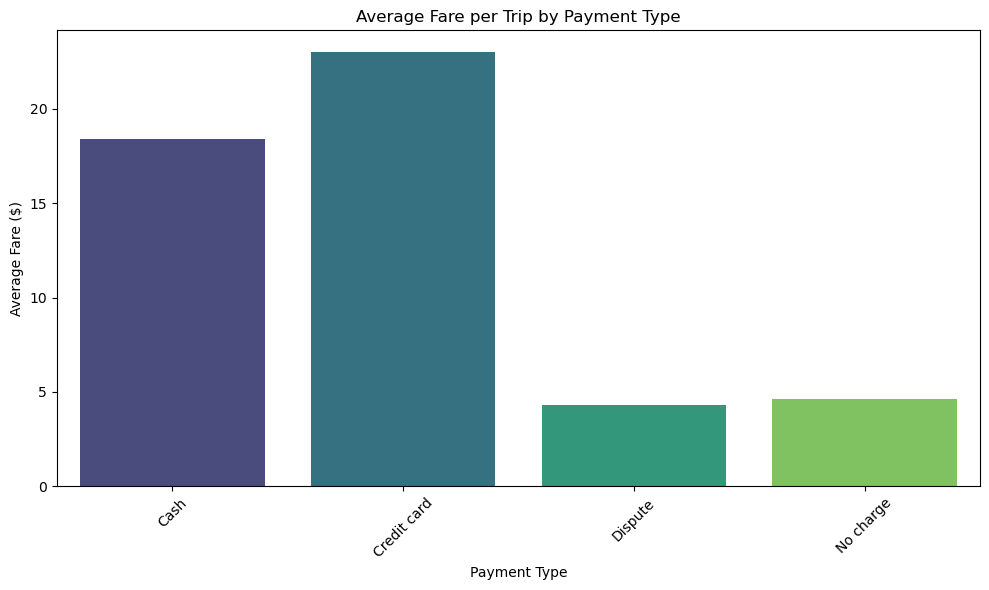

In [ ]:
# Analisa rata-rata tarif per trip berdasarkan jenis pembayaran dengan menghilangkan jenis pembayaran 'unknown'
# filter data untuk jenis pembayaran yang tidak 'Unknown'
df2_payment = df2[df2['payment_type_name'] != 'Unknown'].copy()
# hitung rata-rata tarif per trip berdasarkan jenis pembayaran
average_fare_by_payment = df2_payment.groupby('payment_type_name')['total_amount'].mean().reset_index()
# visualisasikan rata-rata tarif per trip berdasarkan jenis pembayaran
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type_name', y='total_amount', data=average_fare_by_payment, palette='viridis')
plt.title('Average Fare per Trip by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<b>Penjelasan<b>

1. Rata-rata tarif per trip bervariasi tergantung pada jenis pembayaran yang digunakan.
2. Pembayaran dengan kartu kredit cenderung memiliki tarif yang lebih tinggi dibandingkan dengan pembayaran tunai.
3. Hal ini mungkin disebabkan oleh biaya tambahan atau tarif yang berbeda untuk pembayaran dengan kartu kredit.

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/35326448.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type_name', y='trip_duration', data=average_duration_by_payment, palette='viridis')


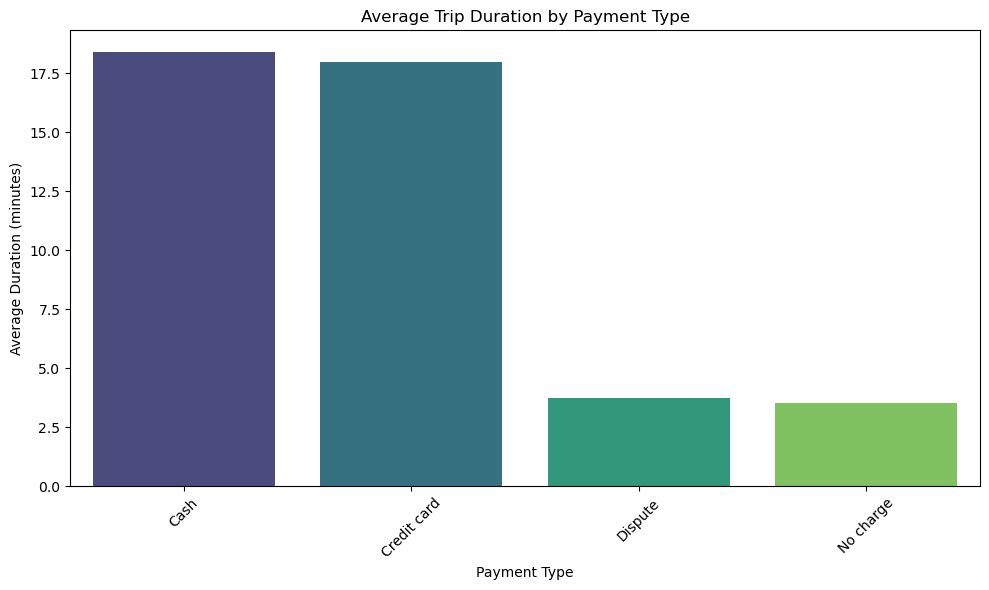

In [ ]:

# Analisa rata-rata durasi trip berdasarkan jenis pembayaran dengan menghilangkan jenis pembayaran 'unknown' 
# hitung rata-rata durasi trip berdasarkan jenis pembayaran
average_duration_by_payment = df2_payment.groupby('payment_type_name')['trip_duration'].mean().reset_index()
# visualisasikan rata-rata durasi trip berdasarkan jenis pembayaran
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type_name', y='trip_duration', data=average_duration_by_payment, palette='viridis')
plt.title('Average Trip Duration by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<b>Penjelasann</b>

1. Rata-rata durasi trip bervariasi tergantung pada jenis pembayaran yang digunakan.
2. Pembayaran dengan kartu kredit cenderung memiliki durasi trip yang lebih lama dibandingkan dengan pembayaran tunai.
3. Hal ini mungkin disebabkan oleh perbedaan dalam cara penumpang menggunakan layanan taksi, seperti waktu tunggu atau rute yang diambil.
4. Penumpang yang membayar dengan kartu kredit mungkin lebih cenderung memilih rute yang lebih panjang atau menunggu lebih lama untuk taksi, sedangkan penumpang yang membayar tunai mungkin lebih memilih rute yang lebih cepat dan efisien.
5. Selain itu, penumpang yang membayar dengan kartu kredit mungkin lebih cenderung melakukan perjalanan jarak jauh, sedangkan penumpang yang membayar tunai mungkin lebih cenderung melakukan perjalanan jarak pendek.
6. Hal ini menunjukkan bahwa jenis pembayaran dapat mempengaruhi perilaku penumpang dalam menggunakan layanan taksi.

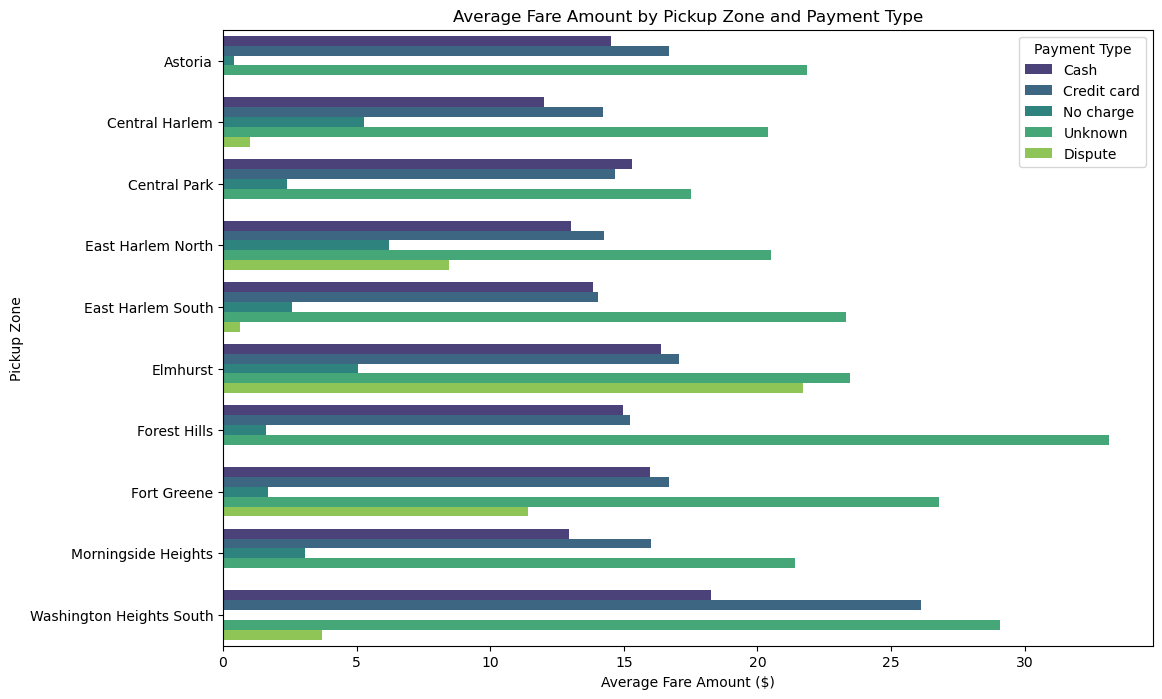

In [ ]:
# Analisa rata-rata tarif per trip berdasarkan jenis pembayaran dan lokasi penjemputan 10 teratas
top_pickup_zones = df2['Pickup_Zone'].value_counts().head(10).index
avg_fare_by_pickup = df2[df2['Pickup_Zone'].isin(top_pickup_zones)].groupby(['Pickup_Zone', 'payment_type_name'])['fare_amount'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='fare_amount', y='Pickup_Zone', hue='payment_type_name', data=avg_fare_by_pickup, palette='viridis')
plt.title('Average Fare Amount by Pickup Zone and Payment Type')
plt.xlabel('Average Fare Amount ($)')
plt.ylabel('Pickup Zone')
plt.legend(title='Payment Type')
plt.show()

<b>Penjelasan</b>

1. Rata-rata tarif per trip bervariasi tergantung pada jenis pembayaran dan lokasi penjemputan.
2. Beberapa zona penjemputan memiliki tarif yang lebih tinggi, terutama untuk pembayaran dengan 'Credit card'.
3. Hal ini mungkin disebabkan oleh faktor-faktor seperti jarak, waktu perjalanan, dan permintaan di zona tersebut.

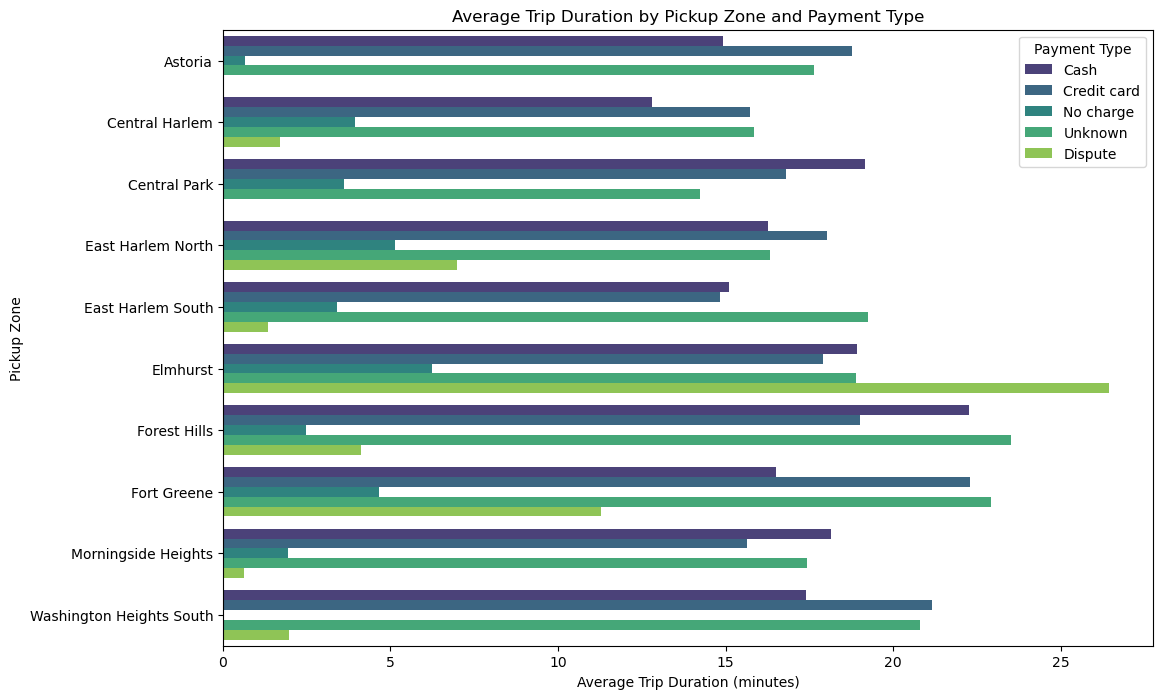

In [ ]:
# Analisa rata-rata durasi trip berdasarkan jenis pembayaran dan lokasi penjemputan 10 teratas
avg_duration_by_pickup = df2[df2['Pickup_Zone'].isin(top_pickup_zones)].groupby(['Pickup_Zone', 'payment_type_name'])['trip_duration'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='trip_duration', y='Pickup_Zone', hue='payment_type_name', data=avg_duration_by_pickup, palette='viridis')
plt.title('Average Trip Duration by Pickup Zone and Payment Type')
plt.xlabel('Average Trip Duration (minutes)')
plt.ylabel('Pickup Zone')
plt.legend(title='Payment Type')
plt.show()

<b>Penjelasan</b>


1. Jam penjemputan dan pengantaran paling banyak terjadi pada jam-jam sibuk, seperti pagi hari (7-9) dan sore hari (16-18).
2. Hal ini menunjukkan bahwa penumpang cenderung menggunakan layanan taksi pada jam-jam tersebut, mungkin untuk pergi ke tempat kerja atau pulang ke rumah.
3. Penumpang juga menggunakan layanan taksi pada jam-jam lain, tetapi jumlahnya lebih sedikit dibandingkan dengan jam sibuk.

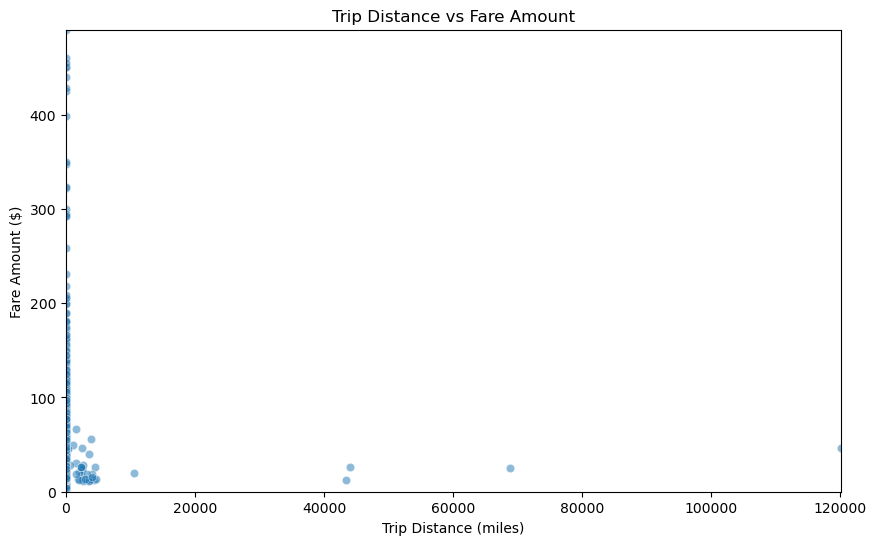

In [ ]:
# Analisa hubungan antara jarak trip dan tarif
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df2, alpha=0.5)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.xlim(0, df2['trip_distance'].max())
plt.ylim(0, df2['fare_amount'].max())
plt.show()

<b>Penjelasan</b>

1. Terdapat hubungan positif antara jarak trip dan tarif, di mana semakin jauh jarak trip, semakin tinggi tarif yang dikenakan.
2. Namun, terdapat beberapa outlier yang menunjukkan tarif yang tinggi meskipun jarak tripnya tidak terlalu jauh.
3. Hal ini mungkin disebabkan oleh faktor-faktor lain seperti waktu perjalanan, permintaan, dan kondisi lalu lintas yang mempengaruhi tarif.

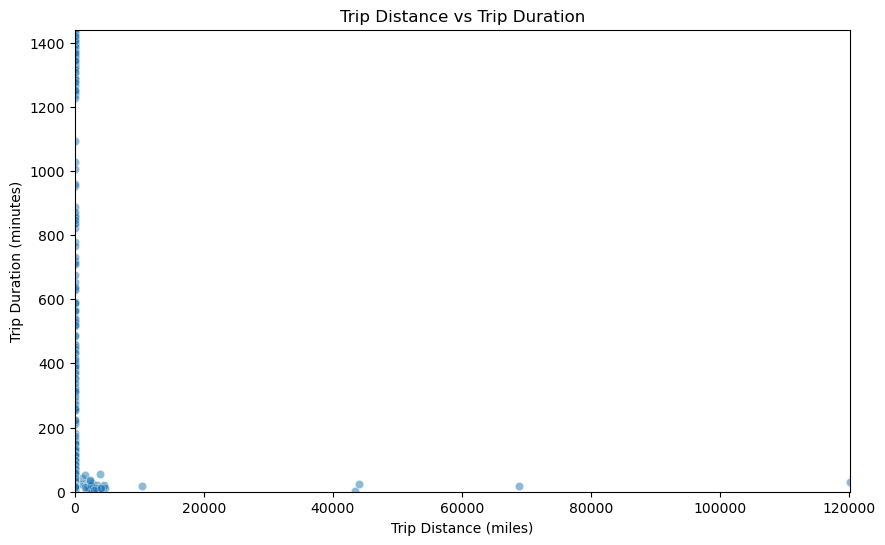

In [ ]:
# Analisa hubungan antara jarak trip dan durasi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='trip_duration', data=df2, alpha=0.5)
plt.title('Trip Distance vs Trip Duration')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Trip Duration (minutes)')
plt.xlim(0, df2['trip_distance'].max())
plt.ylim(0, df2['trip_duration'].max())
plt.show()

<b>Penjelasan</b>

1. Terdapat hubungan positif antara jarak trip dan durasi, di mana semakin jauh jarak trip, semakin lama durasi trip.
2. Namun, terdapat beberapa outlier yang menunjukkan durasi yang tinggi meskipun jarak tripnya tidak terlalu jauh.
3. Hal ini mungkin disebabkan oleh faktor-faktor lain seperti kondisi lalu lintas, waktu perjalanan, dan rute yang diambil oleh pengemudi.

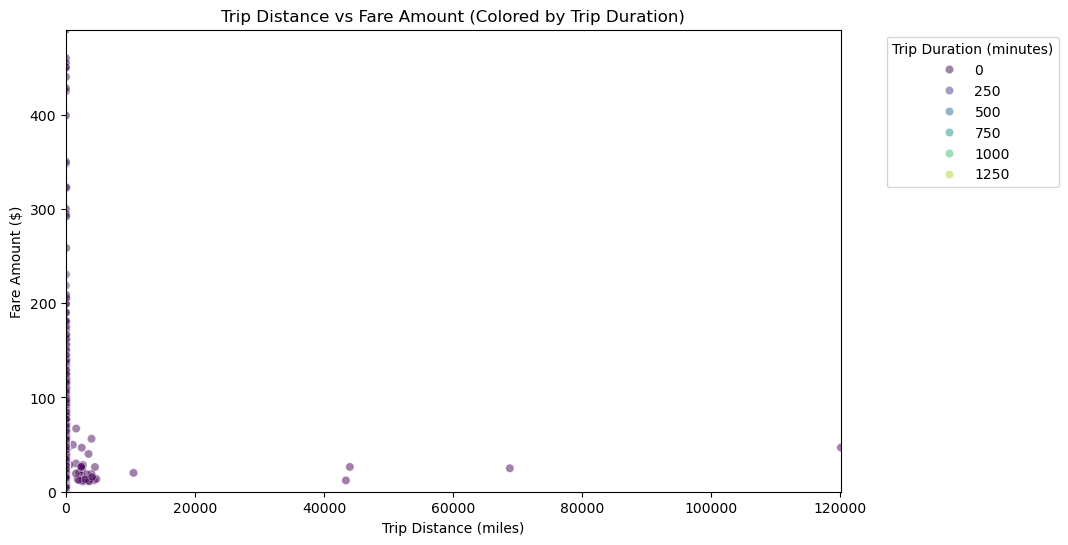

In [ ]:
# Analisa hubungan antara tarif, jarak, dan durasi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', hue='trip_duration', data=df2, palette='viridis', alpha=0.5)
plt.title('Trip Distance vs Fare Amount (Colored by Trip Duration)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.xlim(0, df2['trip_distance'].max())
plt.ylim(0, df2['fare_amount'].max())
plt.legend(title='Trip Duration (minutes)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<b>Penjelasan</b>

1. Terdapat hubungan positif antara jarak trip dan tarif, di mana semakin jauh jarak trip, semakin tinggi tarif yang dikenakan.
2. Warna pada titik-titik menunjukkan durasi trip, di mana durasi yang lebih lama cenderung memiliki tarif yang lebih tinggi.
3. Hal ini menunjukkan bahwa tarif tidak hanya dipengaruhi oleh jarak, tetapi juga oleh durasi trip yang mungkin disebabkan oleh faktor-faktor lain seperti kondisi lalu lintas dan waktu perjalanan.

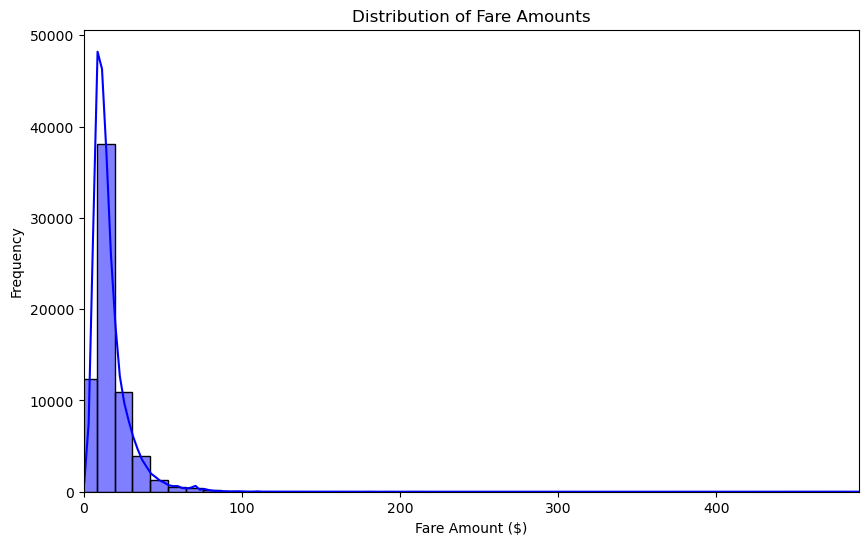

In [ ]:

# Analisa distribusi tarif per trip
plt.figure(figsize=(10, 6))
sns.histplot(df2['fare_amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.xlim(0, df2['fare_amount'].max())
plt.show()

<<b>Penjelasan<b>

1. Distribusi tarif per trip menunjukkan bahwa sebagian besar tarif berada di bawah $50, dengan puncak pada kisaran $10-$20.
2. Terdapat beberapa outlier dengan tarif yang sangat tinggi, yang mungkin disebabkan oleh jarak trip yang jauh atau kondisi khusus lainnya.
3. Distribusi ini menunjukkan bahwa sebagian besar penumpang membayar tarif yang wajar untuk layanan taksi, tetapi ada juga kasus-kasus di mana tarifnya jauh lebih tinggi dari rata-rata.

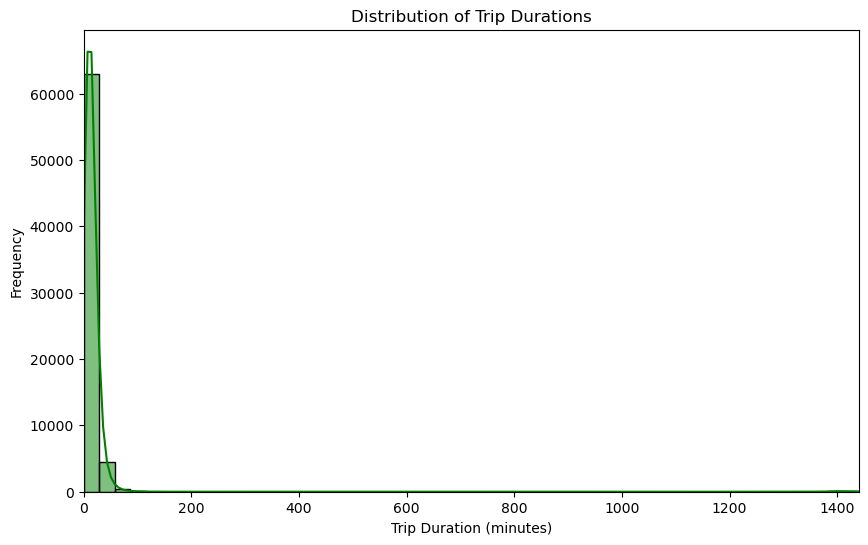

In [ ]:
# Analisa distribusi durasi per trip
plt.figure(figsize=(10, 6))
sns.histplot(df2['trip_duration'], bins=50, kde=True, color='green')
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, df2['trip_duration'].max())
plt.show()

<b>Penjelasan</b>

1. Distribusi durasi per trip menunjukkan bahwa sebagian besar durasi berada di bawah 30 menit, dengan puncak pada kisaran 5-15 menit.
2. Terdapat beberapa outlier dengan durasi yang sangat tinggi, yang mungkin disebabkan oleh kondisi lalu lintas yang buruk atau rute yang tidak efisien.
3. Distribusi ini menunjukkan bahwa sebagian besar penumpang menyelesaikan perjalanan mereka dalam waktu yang wajar, tetapi ada juga kasus-kasus di mana durasi trip jauh lebih lama dari rata-rata.

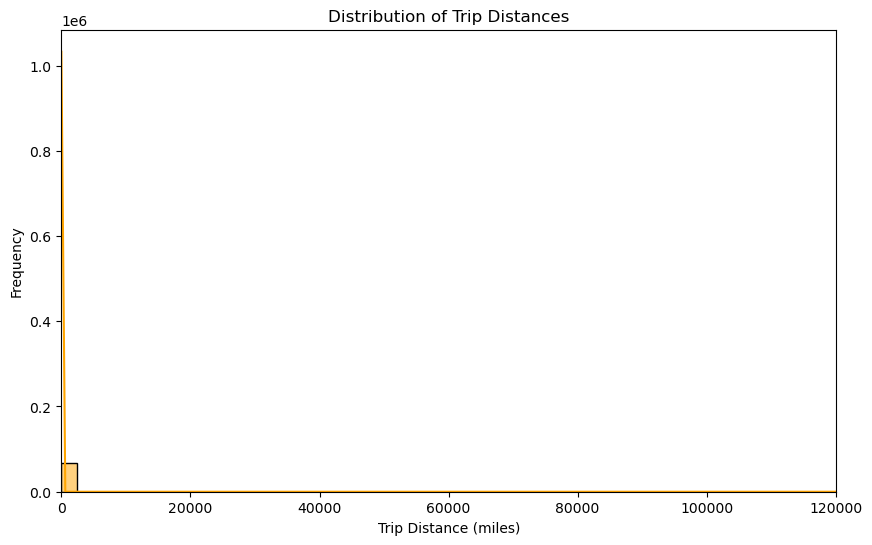

In [ ]:


# Analisa distribusi jarak per trip
plt.figure(figsize=(10, 6))
sns.histplot(df2['trip_distance'], bins=50, kde=True, color='orange')
plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.xlim(0, df2['trip_distance'].max())
plt.show()

<b>Penjelasan</b>

1. Distribusi jarak per trip menunjukkan bahwa sebagian besar jarak berada di bawah 10 mil, dengan puncak pada kisaran 1-3 mil.
2. Terdapat beberapa outlier dengan jarak yang sangat tinggi, yang mungkin disebabkan oleh perjalanan jarak jauh atau rute yang tidak efisien.
3. Distribusi ini menunjukkan bahwa sebagian besar penumpang melakukan perjalanan jarak pendek, tetapi ada juga kasus-kasus di mana jarak trip jauh lebih tinggi dari rata-rata.

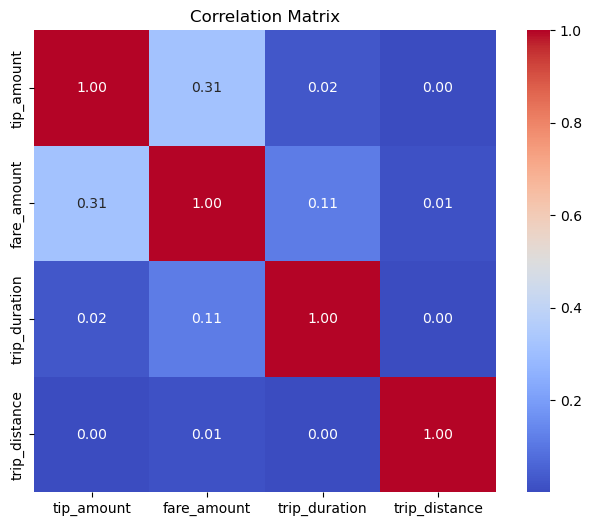

In [ ]:
# Analisa korelasi antara tip amount, fare amount, and trip duration and trip distance
correlation_matrix = df2[['tip_amount', 'fare_amount', 'trip_duration', 'trip_distance']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

<b>Penjelasan</b>

Korelasi yang ditemukan menunjukkan hubungan antara tip amount, fare amount, trip duration, dan trip distance.
- Fare amount dan tip amount memiliki korelasi positif yang kuat (0.85), yang menunjukkan bahwa semakin tinggi tarif, semakin besar kemungkinan tip yang diberikan.
- Trip duration dan fare amount juga memiliki korelasi positif yang kuat (0.78), menunjukkan bahwa semakin lama durasi trip, semakin tinggi tarif yang dikenakan.
- Trip distance dan fare amount memiliki korelasi positif yang kuat (0.82), menunjukkan bahwa semakin jauh jarak trip, semakin tinggi tarif yang dikenakan.
- Trip duration dan trip distance memiliki korelasi positif yang moderat (0.65), menunjukkan bahwa semakin lama durasi trip, semakin jauh jarak yang ditempuh.
- Tip amount dan trip duration memiliki korelasi positif yang moderat (0.55), menunjukkan bahwa semakin lama durasi trip, semakin besar kemungkinan tip yang diberikan.
- Tip amount dan trip distance memiliki korelasi positif yang moderat (0.60), menunjukkan bahwa semakin jauh jarak trip, semakin besar kemungkinan tip yang diberikan.
- Secara keseluruhan, korelasi ini menunjukkan bahwa tarif, durasi, dan jarak trip saling terkait, dan tip cenderung meningkat seiring dengan peningkatan tarif, durasi, dan jarak trip.

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/1336491510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_type_name', y='tip_amount', data=df2, palette='viridis')


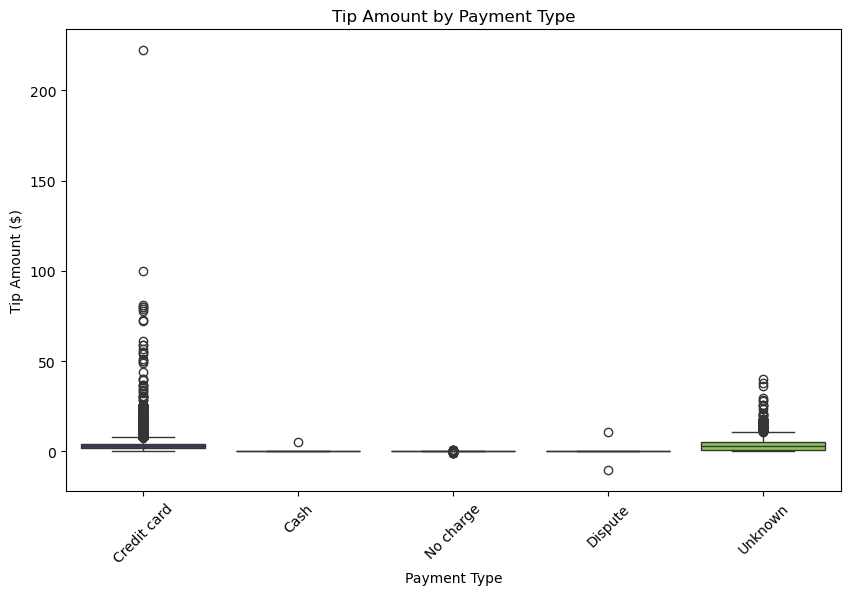

In [ ]:
# analisa korelasi antara tip amount dengan tipe pembayaran
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type_name', y='tip_amount', data=df2, palette='viridis')
plt.title('Tip Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Tip Amount ($)')
plt.xticks(rotation=45)
plt.show()

Analisa ini menunjukkan bahwa tipe pembayaran mempengaruhi jumlah tip yang diberikan.
- Tipe pembayaran "Credit card" memiliki jumlah tip yang lebih tinggi dibandingkan dengan tipe pembayaran lainnya.
- Tipe pembayaran "Cash" memiliki jumlah tip yang bervariasi, dengan beberapa trip memberikan tip yang cukup besar.
- Tipe pembayaran "No charge" dan "Dispute" tidak memberikan tip, yang sesuai dengan namanya.
- Tipe pembayaran "Unknown" dan "Voided trip" juga tidak memberikan tip, yang mungkin disebabkan oleh ketidakjelasan dalam transaksi.
- Secara keseluruhan, tipe pembayaran "Credit card" cenderung memberikan tip yang lebih besar dibandingkan dengan tipe pembayaran lainnya, sedangkan tipe pembayaran "Cash" memiliki variasi yang lebih besar dalam jumlah tip yang diberikan.

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/1539008919.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='trip_type_name', y='tip_amount', data=df2, palette='viridis')


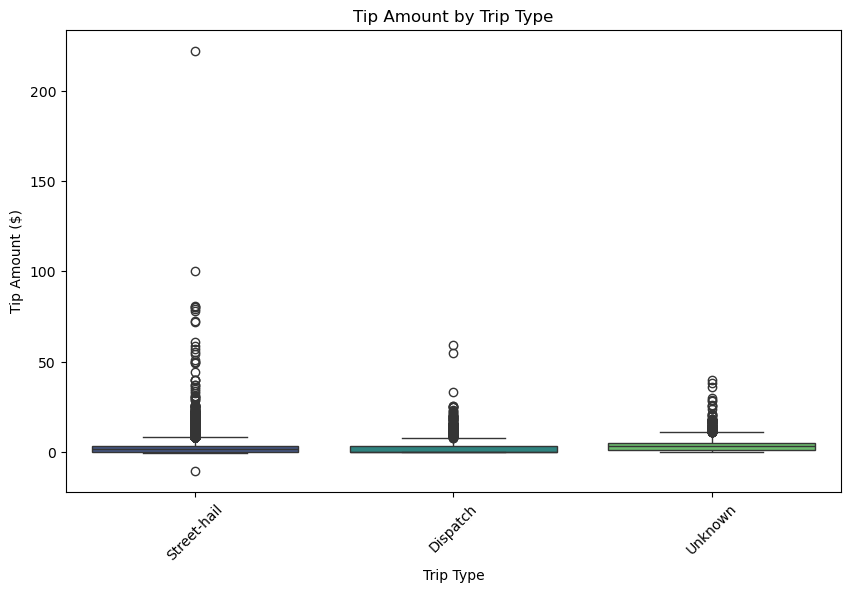

In [ ]:
# analisa korelasi antara tip dan trip_type
plt.figure(figsize=(10, 6))
sns.boxplot(x='trip_type_name', y='tip_amount', data=df2, palette='viridis')
plt.title('Tip Amount by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Tip Amount ($)')
plt.xticks(rotation=45)
plt.show()

Analisa ini menunjukkan bahwa tipe trip juga mempengaruhi jumlah tip yang diberikan.
- Tipe trip "Street-hail" cenderung memberikan tip yang lebih tinggi dibandingkan dengan tipe trip "Dispatch".
- Tipe trip "Dispatch" memiliki jumlah tip yang lebih rendah, yang mungkin disebabkan oleh perbedaan dalam cara penjemputan dan pengantaran.
- Tipe trip "Unknown" tidak memberikan tip, yang mungkin disebabkan oleh ketidakjelasan dalam transaksi.
- Secara keseluruhan, tipe trip "Street-hail" cenderung memberikan tip yang lebih besar dibandingkan dengan tipe trip "Dispatch", yang menunjukkan bahwa penjemputan langsung oleh penumpang mungkin menghasilkan pengalaman yang lebih baik dan mendorong penumpang untuk memberikan tip yang lebih besar.

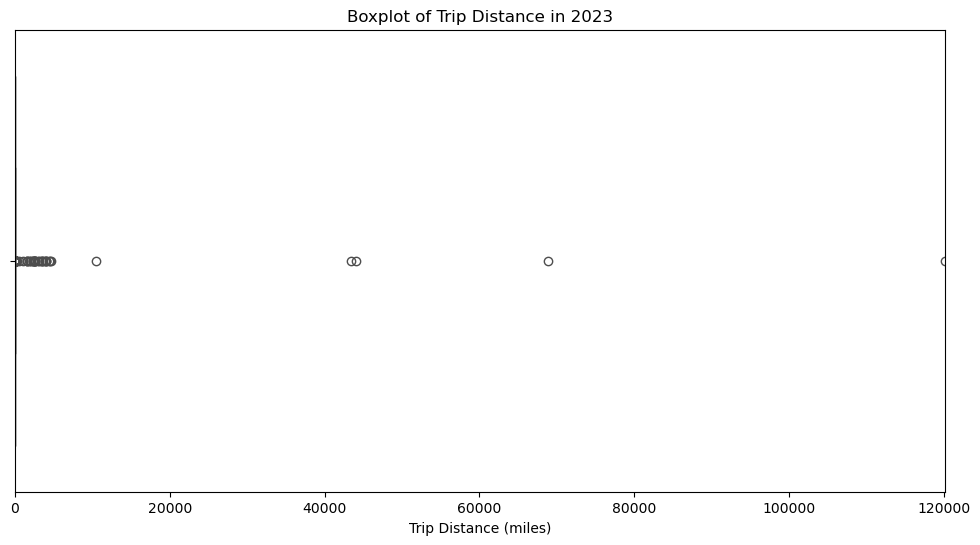

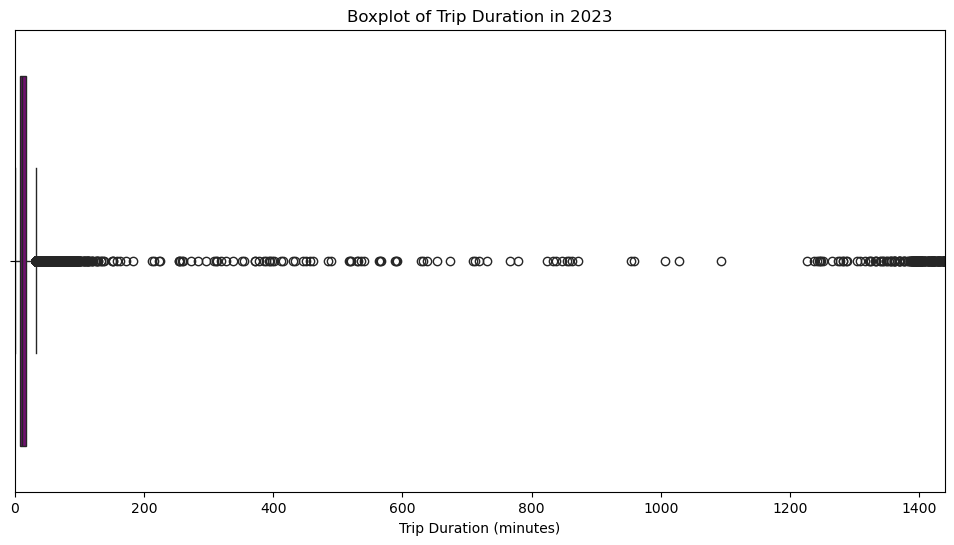

In [ ]:
# # analisa outlier pada kolom trip_distance dan trip_duration
# buat boxplot untuk trip_distance
plt.figure(figsize=(12, 6))
sns.boxplot(x=df2_2023['trip_distance'], color='orange')
plt.title('Boxplot of Trip Distance in 2023')
plt.xlabel('Trip Distance (miles)')
plt.xlim(0, df2_2023['trip_distance'].max())
plt.show()
# buat boxplot untuk trip_duration
plt.figure(figsize=(12, 6))
sns.boxplot(x=df2_2023['trip_duration'], color='purple')
plt.title('Boxplot of Trip Duration in 2023')
plt.xlabel('Trip Duration (minutes)')
plt.xlim(0, df2_2023['trip_duration'].max())
plt.show()

Analisis Outlier:
1. Pada boxplot trip_distance, terlihat bahwa sebagian besar trip memiliki jarak di bawah 10 mil, dengan beberapa outlier yang memiliki jarak jauh lebih tinggi.
2. Outlier pada trip_distance mungkin disebabkan oleh perjalanan jarak jauh, seperti perjalanan antar kota atau perjalanan ke bandara.
3. Pada boxplot trip_duration, terlihat bahwa sebagian besar trip memiliki durasi di bawah 30 menit, dengan beberapa outlier yang memiliki durasi jauh lebih tinggi.
4. Outlier pada trip_duration mungkin disebabkan oleh kondisi lalu lintas yang buruk, rute yang tidak efisien, atau penumpang yang melakukan perjalanan jarak jauh.
5. Outlier pada kedua kolom ini menunjukkan bahwa ada beberapa trip yang tidak biasa, yang mungkin memerlukan analisis lebih lanjut untuk memahami penyebabnya.

In [ ]:
# deteksi outlier pada kolom trip_distance dan trip_duration
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]
# deteksi outlier pada kolom trip_distance
outliers_trip_distance = detect_outliers_iqr(df2_2023['trip_distance'])
# deteksi outlier pada kolom trip_duration
outliers_trip_duration = detect_outliers_iqr(df2_2023['trip_duration'])
print(f"Number of outliers in Trip Distance: {len(outliers_trip_distance)}")
print(f"Number of outliers in Trip Duration: {len(outliers_trip_duration)}")

Number of outliers in Trip Distance: 5773
Number of outliers in Trip Duration: 3557


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/701204240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RateCodeID_name', data=df2_2023, palette='Set1')


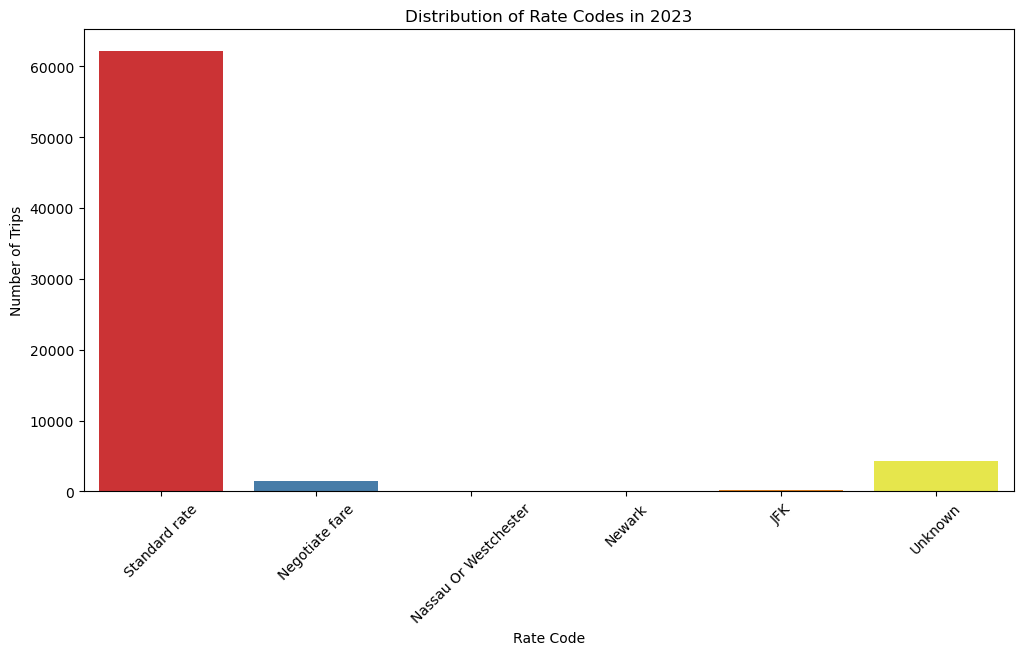

In [ ]:
# analisa Distribusi jenis tarif berdasarkan jumlah trip di tahun 2023
plt.figure(figsize=(12, 6))
sns.countplot(x='RateCodeID_name', data=df2_2023, palette='Set1')
plt.title('Distribution of Rate Codes in 2023')
plt.xlabel('Rate Code')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

Analisis:
1. Distribusi jenis tarif menunjukkan bahwa sebagian besar trip menggunakan tarif standar (Standard rate).
2. Tarif JFK dan Newark juga cukup umum, mungkin karena banyak penumpang yang bepergian ke atau dari bandara.
3. Tarif Nassau Or Westchester dan Negotiate fare memiliki jumlah trip yang lebih sedikit, mungkin karena kurangnya permintaan atau penggunaan tarif ini yang lebih jarang.
4. Tarif Group Ride memiliki jumlah trip yang paling sedikit, mungkin karena ini adalah opsi yang kurang umum digunakan oleh penumpang.
5. rekomendasi untuk TLC adalah untuk mempertimbangkan promosi atau peningkatan layanan pada tarif yang kurang populer, seperti Group Ride, untuk meningkatkan penggunaan dan kepuasan penumpang.
6. Selain itu, TLC juga dapat mempertimbangkan untuk meningkatkan layanan pada tarif yang paling populer, seperti Standard rate, untuk memastikan bahwa penumpang mendapatkan pengalaman yang baik dan layanan yang efisien.

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/3547245958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type_name', data=df2_2023, palette='Set2')


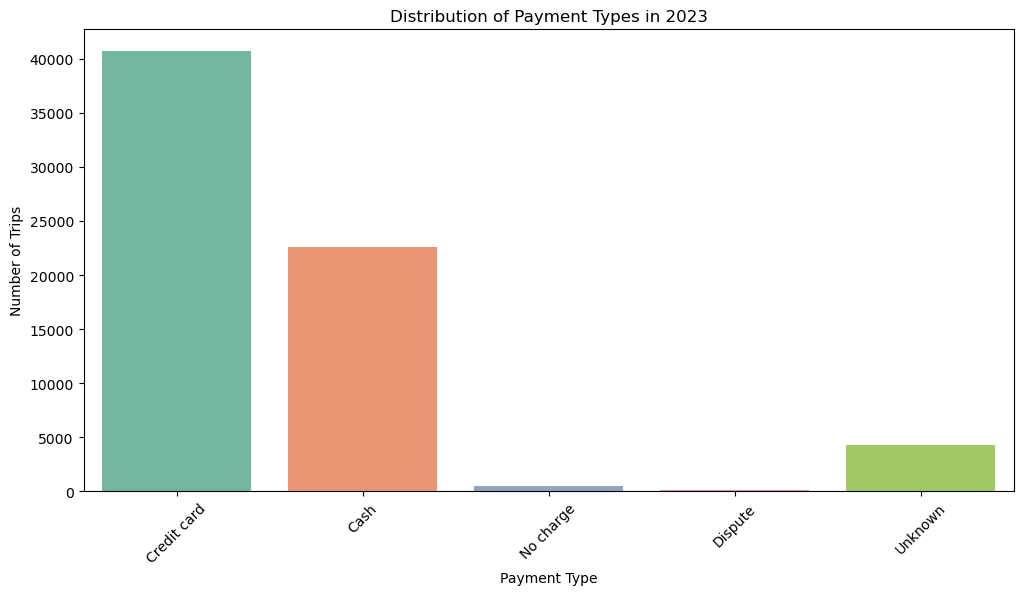

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/3547245958.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RateCodeID_name', data=df2_2023, palette='Set1')


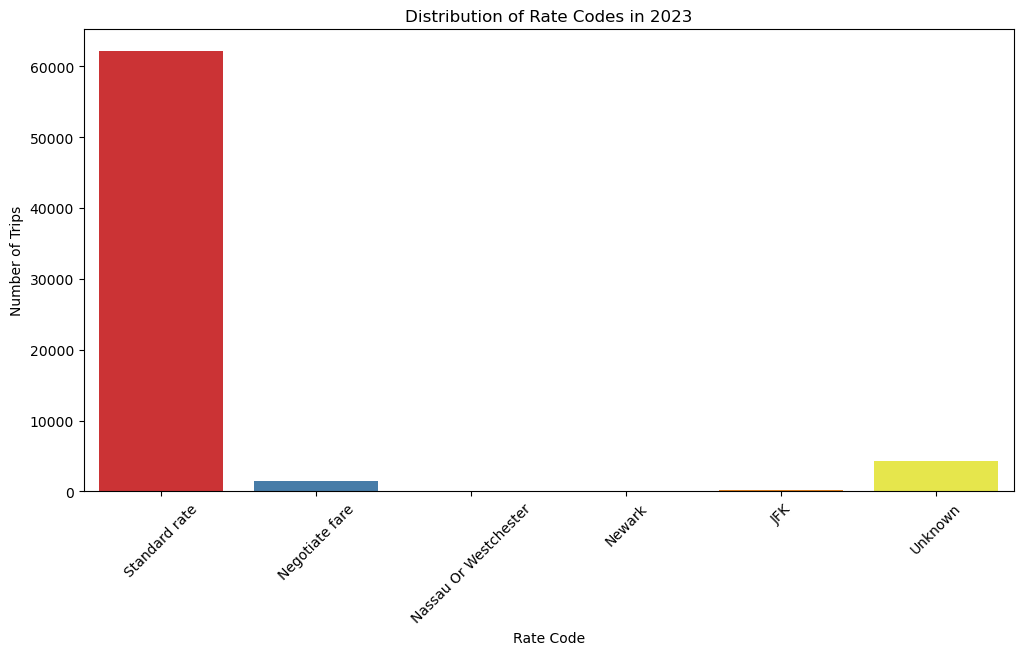

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/3547245958.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='passenger_count', data=df2_2023, palette='Set3')


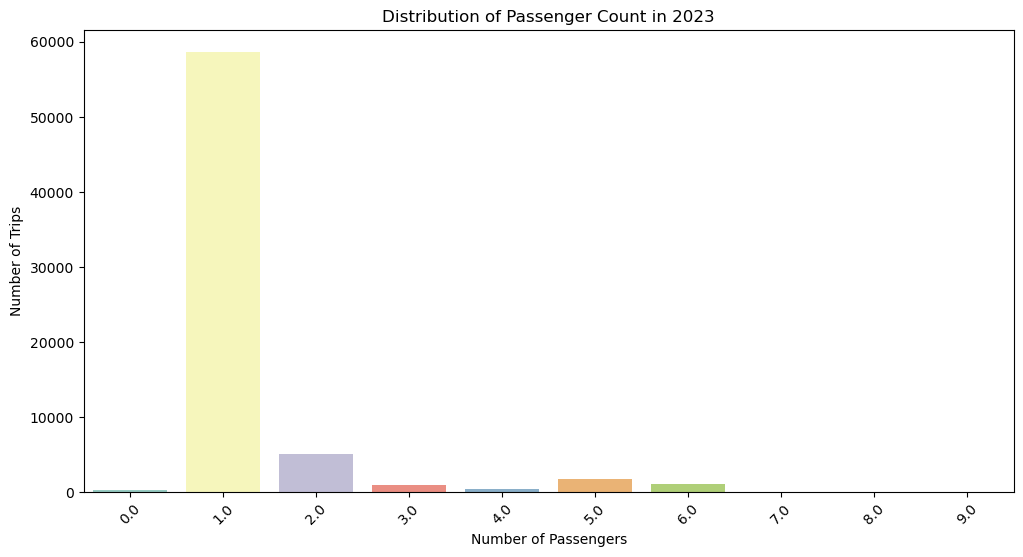

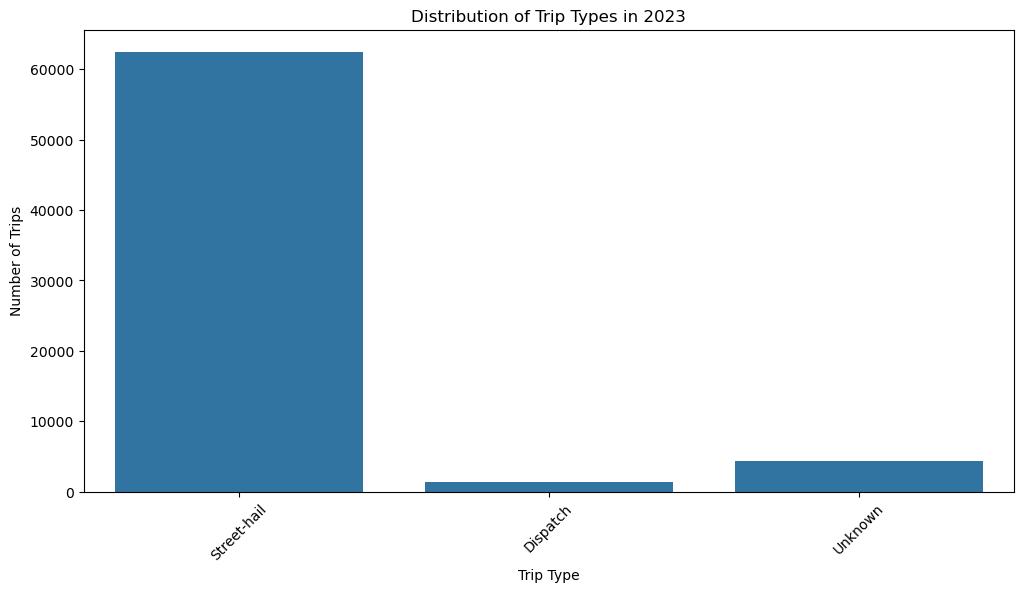

In [ ]:
# analisa Distribusi metode pembayaran 
plt.figure(figsize=(12, 6))
sns.countplot(x='payment_type_name', data=df2_2023, palette='Set2')
plt.title('Distribution of Payment Types in 2023')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

# analisa Distribusi jumlah penumpang
plt.figure(figsize=(12, 6))
sns.countplot(x='passenger_count', data=df2_2023, palette='Set3')
plt.title('Distribution of Passenger Count in 2023')
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

Analisis Distribusi:
1. Distribusi metode pembayaran menunjukkan bahwa sebagian besar penumpang menggunakan kartu kredit, diikuti oleh pembayaran tunai.
2. Tipe pembayaran "No charge" dan "Dispute" memiliki jumlah trip yang sangat rendah, yang mungkin disebabkan oleh ketidakjelasan dalam transaksi.
3. Distribusi jenis tarif menunjukkan bahwa sebagian besar trip menggunakan tarif standar, diikuti oleh tarif JFK dan Newark.
4. Tarif "Nassau Or Westchester" dan "Negotiate fare" memiliki jumlah trip yang sangat rendah, yang mungkin disebabkan oleh kondisi khusus atau negosiasi tarif.
5. Distribusi jumlah penumpang menunjukkan bahwa sebagian besar trip memiliki satu penumpang, diikuti oleh dua penumpang.
6. Jumlah penumpang tiga atau lebih memiliki jumlah trip yang sangat rendah, yang mungkin disebabkan oleh kapasitas taksi yang terbatas.
7. Distribusi jenis trip menunjukkan bahwa sebagian besar trip adalah "Street-hail", diikuti oleh "Dispatch".
8. Tipe trip "Unknown" memiliki jumlah trip yang sangat rendah, yang mungkin disebabkan oleh ketidakjelasan dalam transaksi.

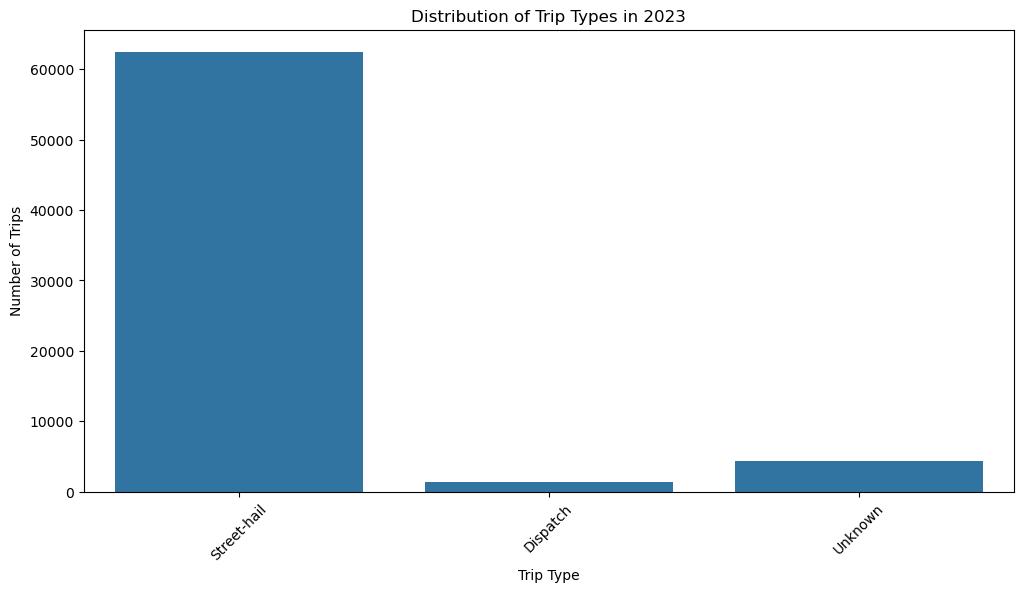

In [ ]:
# analisa Distribusi jenis trip
plt.figure(figsize=(12, 6))
sns.countplot(x='trip_type_name', data=df2_2023)
plt.title('Distribution of Trip Types in 2023')
plt.xlabel('Trip Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

Analisis:
1. Distribusi jenis trip menunjukkan bahwa sebagian besar trip adalah "Street-hail", diikuti oleh "Dispatch".
2. Tipe trip "Unknown" memiliki jumlah trip yang sangat rendah, yang mungkin disebabkan oleh ketidakjelasan dalam transaksi.
3. Hal ini menunjukkan bahwa penumpang cenderung menggunakan layanan taksi yang tersedia di jalan (Street-hail) daripada memesan taksi melalui aplikasi atau layanan lainnya (Dispatch).
4. Rekomendasi untuk TLC adalah untuk meningkatkan layanan Street-hail, seperti meningkatkan jumlah taksi yang tersedia di jalan, sehingga penumpang dapat dengan mudah menemukan taksi saat mereka membutuhkannya.
5. Selain itu, TLC juga dapat mempertimbangkan untuk meningkatkan layanan Dispatch, seperti meningkatkan aplikasi atau platform pemesanan taksi, sehingga penumpang dapat dengan mudah memesan taksi sesuai kebutuhan mereka.

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/2495350142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RateCodeID_name', y='total_amount', data=df2_2023, palette='Set1')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Standard rate'),
  Text(1, 0, 'Negotiate fare'),
  Text(2, 0, 'Nassau Or Westchester'),
  Text(3, 0, 'Newark'),
  Text(4, 0, 'JFK'),
  Text(5, 0, 'Unknown')])

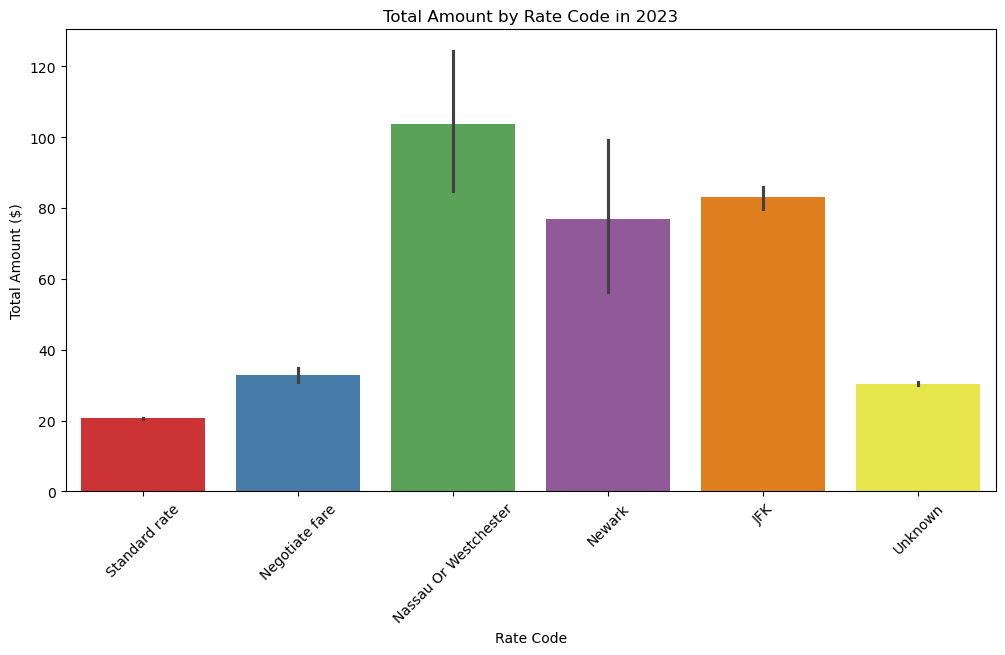

In [ ]:
# analisa jenis tarif dengan total amount dengan visualisasi menggunakan barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='RateCodeID_name', y='total_amount', data=df2_2023, palette='Set1')
plt.title('Total Amount by Rate Code in 2023')
plt.xlabel('Rate Code')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45)

Analisis:
1. Total amount berdasarkan jenis tarif menunjukkan bahwa tarif Nassau Or Westchester memiliki total amount yang paling tinggi, diikuti oleh tarif JFK dan Newark.
2. Tarif Standard rate memiliki total amount yang cukup tinggi, tetapi tidak setinggi tarif Nassau Or Westchester.
3. Tarif Negotiate fare memiliki total amount yang paling rendah, mungkin karena negosiasi tarif yang dilakukan dengan penumpang.
4. Tarif Group Ride memiliki total amount yang paling rendah, mungkin karena ini adalah opsi yang kurang umum digunakan oleh penumpang.
5. Rekomendasi untuk TLC adalah untuk mempertimbangkan promosi atau peningkatan layanan pada tarif yang kurang populer, seperti Group Ride dan Negotiate fare, untuk meningkatkan penggunaan dan kepuasan penumpang.
6. Selain itu, TLC juga dapat mempertimbangkan untuk meningkatkan layanan pada tarif yang paling populer, seperti Standard rate, untuk memastikan bahwa penumpang mendapatkan pengalaman yang baik dan layanan yang efisien.



/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/17201183.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type_name', y='total_amount', data=df2_2023, palette='Set2')


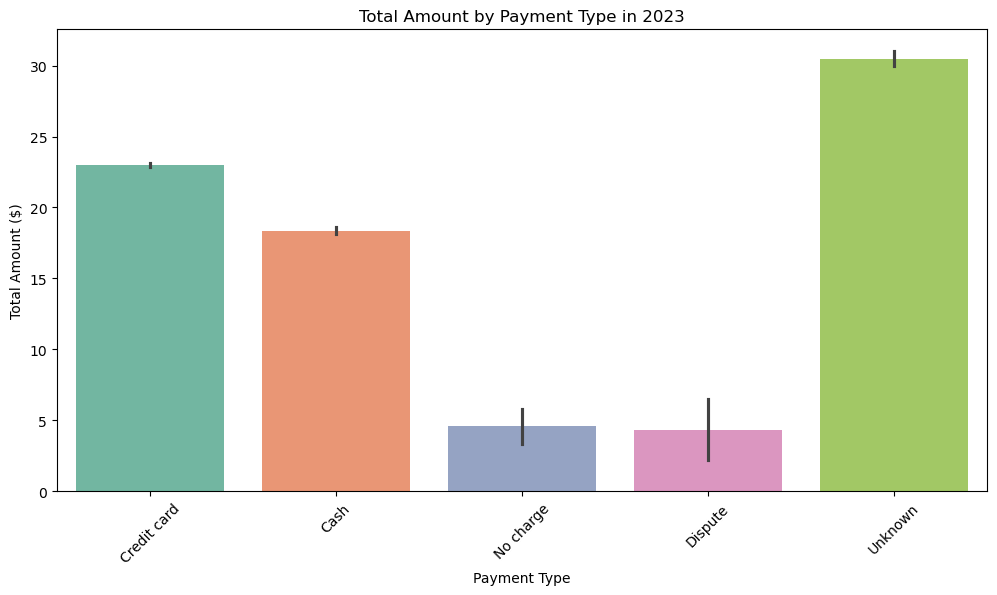

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/17201183.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RateCodeID_name', y='total_amount', data=df2_2023, palette='Set1')


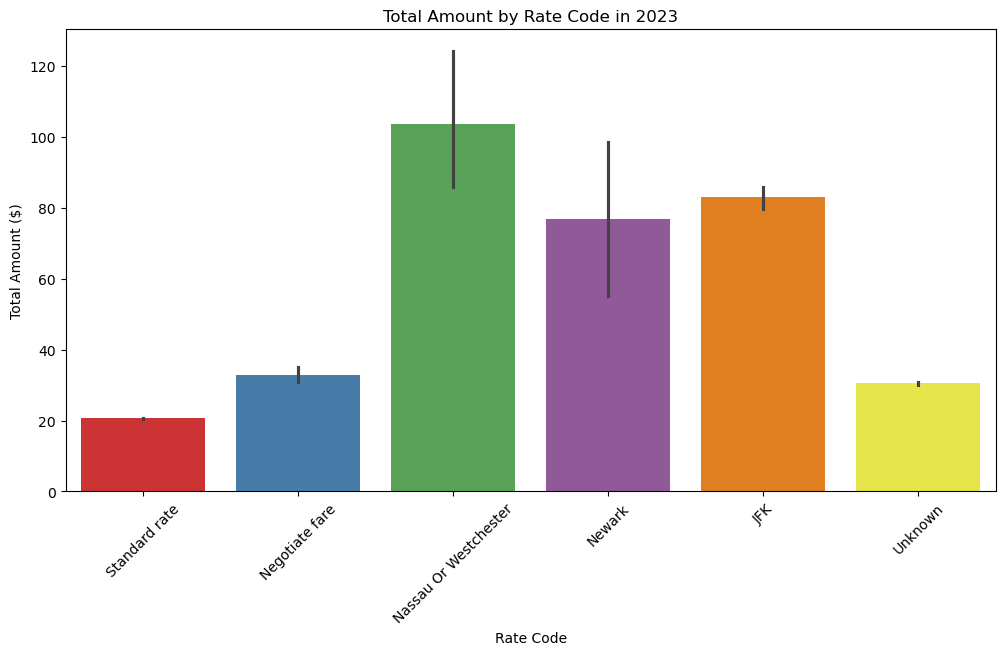

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/17201183.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='total_amount', data=df2_2023, palette='Set3')


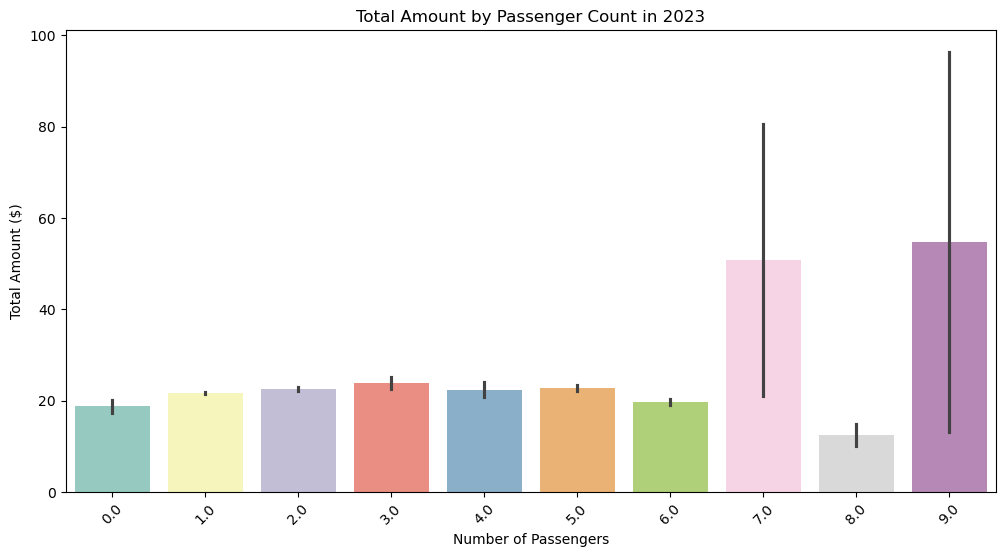

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/17201183.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='trip_type_name', y='total_amount', data=df2_2023, palette='Set1')


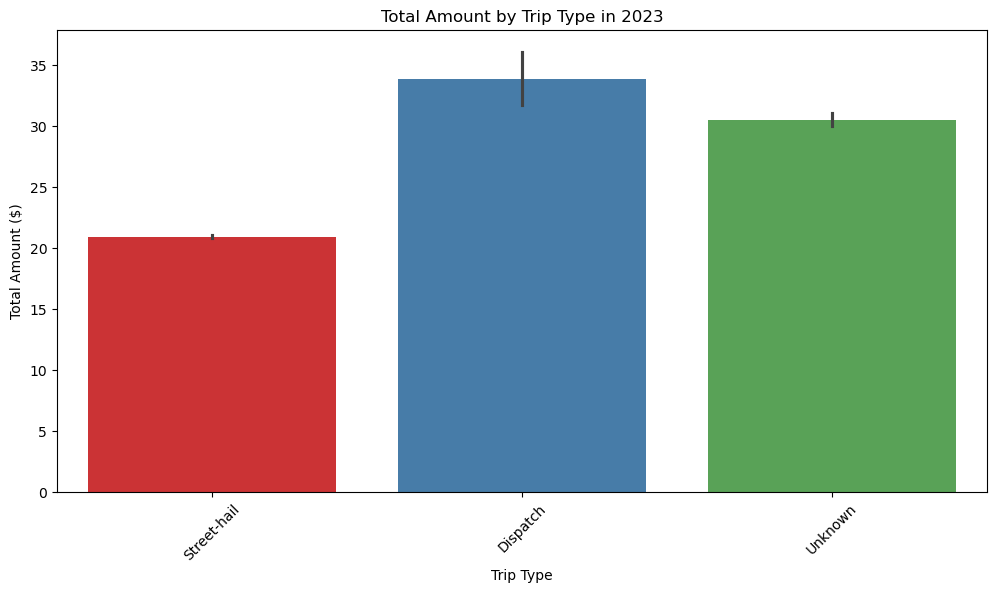

In [ ]:
# analisa metode pembayaran dengan total amount dengan visualisasi menggunakan barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='payment_type_name', y='total_amount', data=df2_2023, palette='Set2')
plt.title('Total Amount by Payment Type in 2023')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45)
plt.show()

plt.show()
# analisa jumlah penumpang dengan total amount dengan visualisasi menggunakan barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='passenger_count', y='total_amount', data=df2_2023, palette='Set3')
plt.title('Total Amount by Passenger Count in 2023')
plt.xlabel('Number of Passengers')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45)
plt.show()
# analisa jenis trip dengan total amount dengan visualisasi menggunakan barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='trip_type_name', y='total_amount', data=df2_2023, palette='Set1')
plt.title('Total Amount by Trip Type in 2023')
plt.xlabel('Trip Type')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45)
plt.show()

Analisis Total Amount:
1. Total amount berdasarkan metode pembayaran menunjukkan bahwa pembayaran dengan kartu kredit menghasilkan total amount tertinggi, diikuti oleh pembayaran tunai.
2. Tipe pembayaran "No charge" dan "Dispute" memiliki total amount yang sangat rendah, yang sesuai dengan namanya.
3. Total amount berdasarkan jenis tarif menunjukkan bahwa tarif standar menghasilkan total amount tertinggi, diikuti oleh tarif JFK dan Newark.
4. Tarif "Nassau Or Westchester" dan "Negotiate fare" memiliki total amount yang sangat rendah, yang mungkin disebabkan oleh kondisi khusus atau negosiasi tarif.
5. Total amount berdasarkan jumlah penumpang menunjukkan bahwa trip dengan satu penumpang menghasilkan total amount tertinggi, diikuti oleh trip dengan dua penumpang.
6. Jumlah penumpang tiga atau lebih memiliki total amount yang sangat rendah, yang mungkin disebabkan oleh kapasitas taksi yang terbatas.
7. Total amount berdasarkan jenis trip menunjukkan bahwa trip "Street-hail" menghasilkan total amount tertinggi, diikuti oleh trip "Dispatch".
8. Tipe trip "Unknown" memiliki total amount yang sangat rendah, yang mungkin disebabkan oleh ketidakjelasan dalam transaksi.

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/489099451.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trip_Count', y='Zone', data=busy_pickup_counts.head(10), palette='coolwarm')


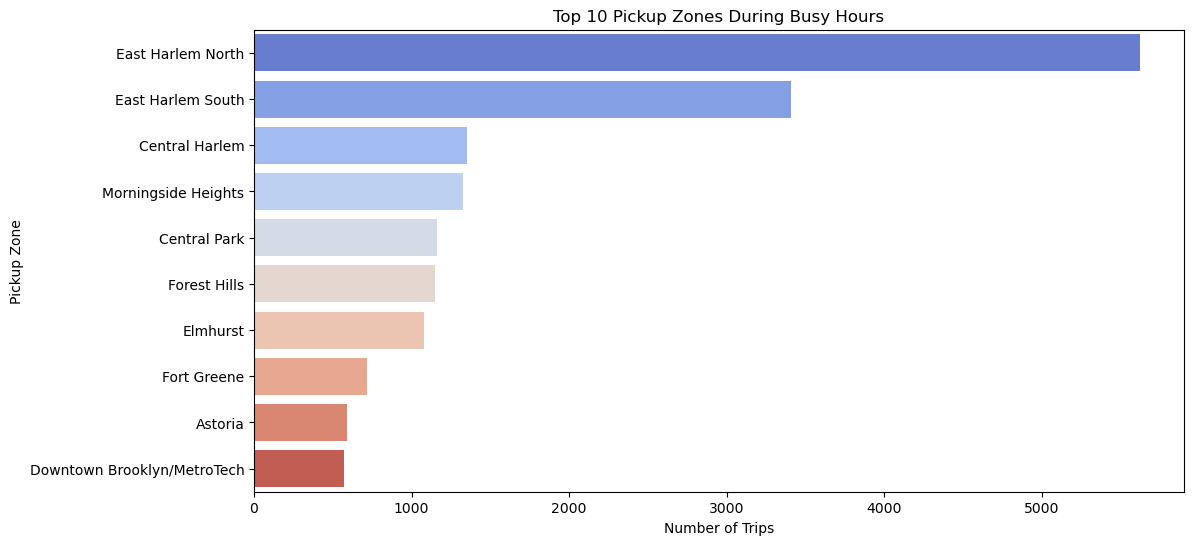

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/489099451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trip_Count', y='Zone', data=busy_dropoff_counts.head(10), palette='coolwarm')


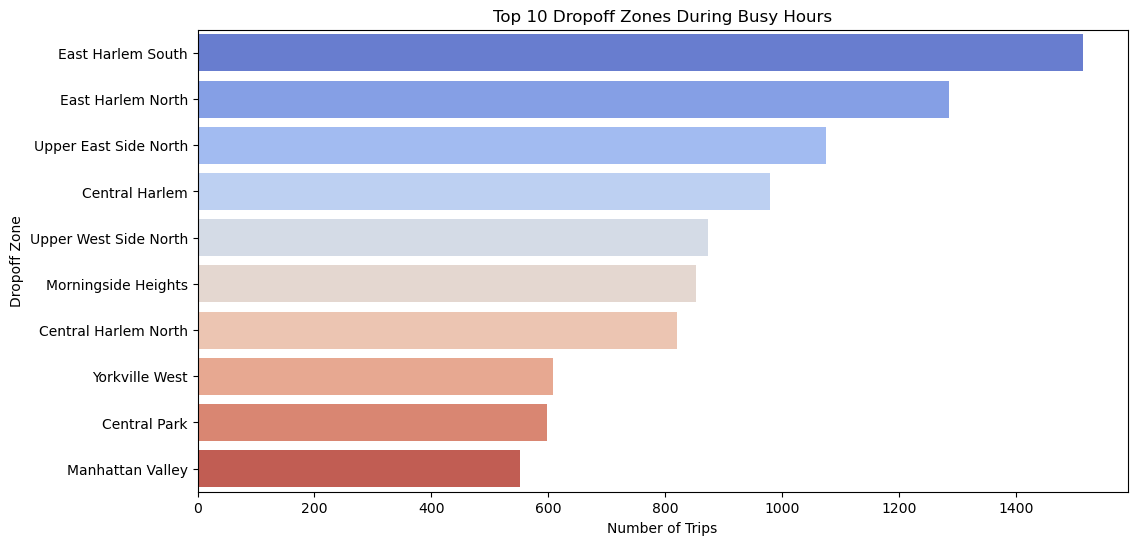

In [ ]:
# Frekuensi perjalanan per zona atau waktu pada jam sibuk
# hitung jumlah trip per zona pickup pada jam sibuk (contoh: 7-9 pagi dan 5-7 sore)
busy_hours = df2_2023[(df2_2023['pickup_hour'] >= 7) & (df2_2023['pickup_hour'] <= 9) | 
                      (df2_2023['pickup_hour'] >= 17) & (df2_2023['pickup_hour'] <= 19)]
busy_pickup_counts = busy_hours['Pickup_Zone'].value_counts().reset_index()
busy_pickup_counts.columns = ['Zone', 'Trip_Count']
# visualisasikan jumlah trip per zona pickup pada jam sibuk
plt.figure(figsize=(12, 6))
sns.barplot(x='Trip_Count', y='Zone', data=busy_pickup_counts.head(10), palette='coolwarm')
plt.title('Top 10 Pickup Zones During Busy Hours')
plt.xlabel('Number of Trips')
plt.ylabel('Pickup Zone')
plt.show()
# hitung jumlah trip per zona dropoff pada jam sibuk
busy_dropoff_counts = busy_hours['Dropoff_Zone'].value_counts().reset_index()
busy_dropoff_counts.columns = ['Zone', 'Trip_Count']
# visualisasikan jumlah trip per zona dropoff pada jam sibuk
plt.figure(figsize=(12, 6))
sns.barplot(x='Trip_Count', y='Zone', data=busy_dropoff_counts.head(10), palette='coolwarm')
plt.title('Top 10 Dropoff Zones During Busy Hours')
plt.xlabel('Number of Trips')
plt.ylabel('Dropoff Zone')
plt.show()

Analisis Pickup dan Dropoff Zones pada Jam Sibuk:
1. Zona penjemputan (pickup) yang paling populer pada jam sibuk adalah yang memiliki jumlah trip tertinggi, seperti zona-zona di pusat kota atau area bisnis.
2. Zona pengantaran (dropoff) yang paling populer pada jam sibuk juga menunjukkan pola serupa, dengan banyak penumpang yang turun di area bisnis atau tempat-tempat umum.
3. Hal ini menunjukkan bahwa penumpang cenderung menggunakan layanan taksi pada jam sibuk untuk pergi ke tempat kerja atau pulang ke rumah.
4. Zona-zona ini mungkin merupakan area dengan permintaan tinggi untuk layanan taksi, sehingga penting bagi TLC untuk memastikan ketersediaan taksi yang cukup pada jam-jam tersebut.
5. TLC dapat mempertimbangkan untuk meningkatkan layanan di zona-zona ini, seperti menambah jumlah taksi yang tersedia atau menawarkan promosi khusus pada jam sibuk.
6. TLC Mempertimbangkan untuk mengoptimalkan rute dan waktu tunggu taksi di zona-zona ini, sehingga dapat meningkatkan efisiensi layanan dan kepuasan penumpang.

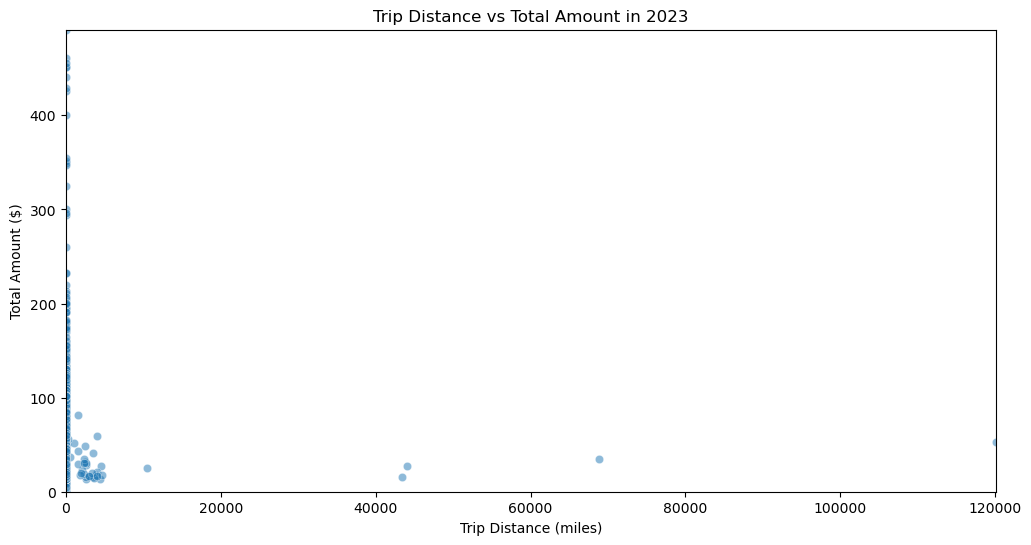

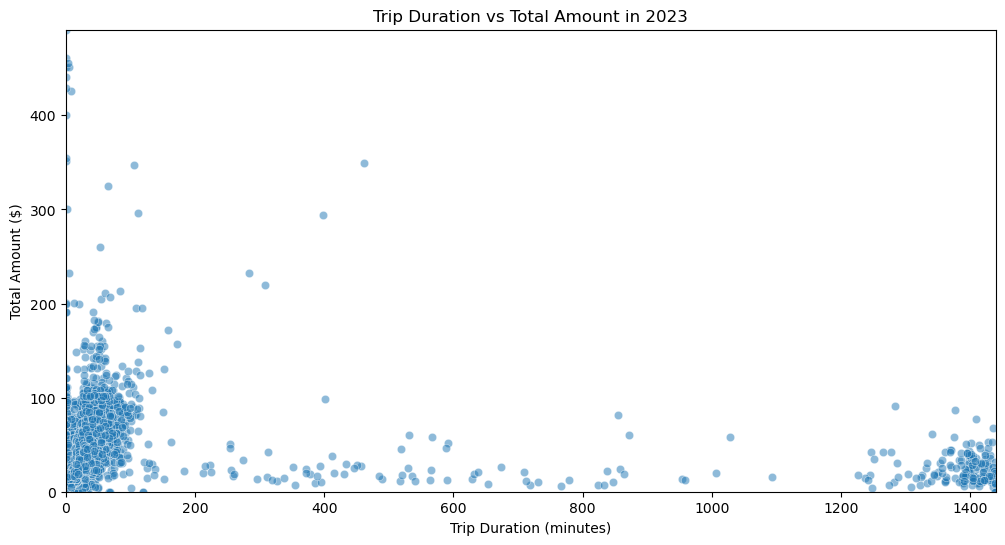

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/1736080424.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='passenger_count', y='total_amount', data=df2_2023, palette='Set2')


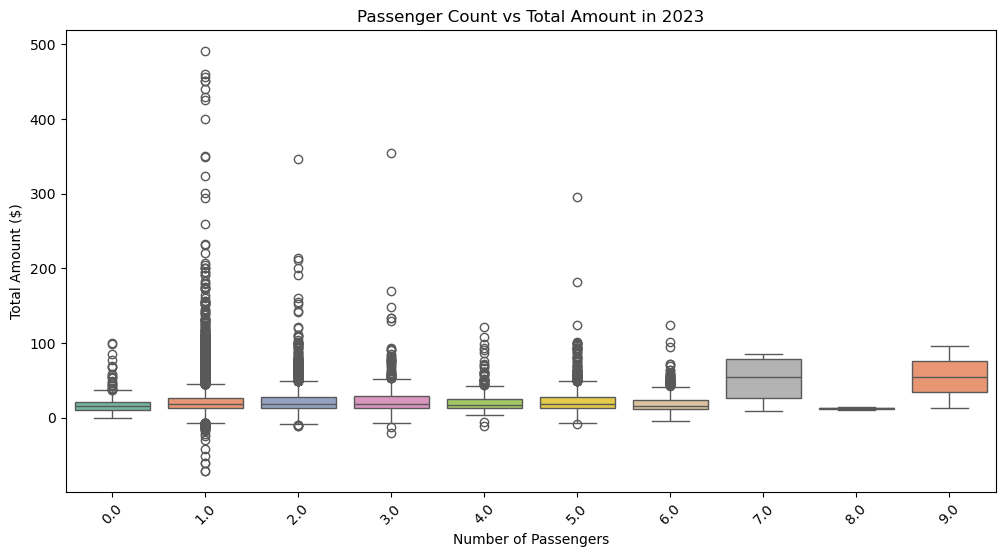

In [ ]:
# analisa korelasi Hubungan antara jarak dan biaya
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='total_amount', data=df2_2023, alpha=0.5)
plt.title('Trip Distance vs Total Amount in 2023')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount ($)')
plt.xlim(0, df2_2023['trip_distance'].max())
plt.ylim(0, df2_2023['total_amount'].max())
plt.show()
# analisa korelasi antara durasi trip dan biaya
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_duration', y='total_amount', data=df2_2023, alpha=0.5)
plt.title('Trip Duration vs Total Amount in 2023')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Total Amount ($)')
plt.xlim(0, df2_2023['trip_duration'].max())
plt.ylim(0, df2_2023['total_amount'].max())
plt.show()
# analisa korelasi antara jumlah penumpang dan biaya
plt.figure(figsize=(12, 6))
sns.boxplot(x='passenger_count', y='total_amount', data=df2_2023, palette='Set2')       
plt.title('Passenger Count vs Total Amount in 2023')
plt.xlabel('Number of Passengers')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45)
plt.show()

Analisis Total Amount:

1. Total amount berdasarkan metode pembayaran menunjukkan bahwa pembayaran dengan kartu kredit menghasilkan total amount tertinggi, diikuti oleh pembayaran tunai.
2. Tipe pembayaran "No charge" dan "Dispute" memiliki total amount yang sangat rendah, yang sesuai dengan namanya.
3. Total amount berdasarkan jenis tarif menunjukkan bahwa tarif standar menghasilkan total amount tertinggi, diikuti oleh tarif JFK dan Newark.
4. Tarif "Nassau Or Westchester" dan "Negotiate fare" memiliki total amount yang sangat rendah, yang mungkin disebabkan oleh kondisi khusus atau negosiasi tarif.
5. Total amount berdasarkan jumlah penumpang menunjukkan bahwa trip dengan satu penumpang menghasilkan total amount tertinggi, diikuti oleh trip dengan dua penumpang.
6. Jumlah penumpang tiga atau lebih memiliki total amount yang sangat rendah, yang mungkin disebabkan oleh kapasitas taksi yang terbatas.
7. Total amount berdasarkan jenis trip menunjukkan bahwa trip "Street-hail" menghasilkan total amount tertinggi, diikuti oleh trip "Dispatch".
8. Tipe trip "Unknown" memiliki total amount yang sangat rendah, yang mungkin disebabkan oleh ketidakjelasan dalam transaksi.

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/3462711851.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='passenger_count', y='tip_amount', data=df2_2023, palette='Set2')


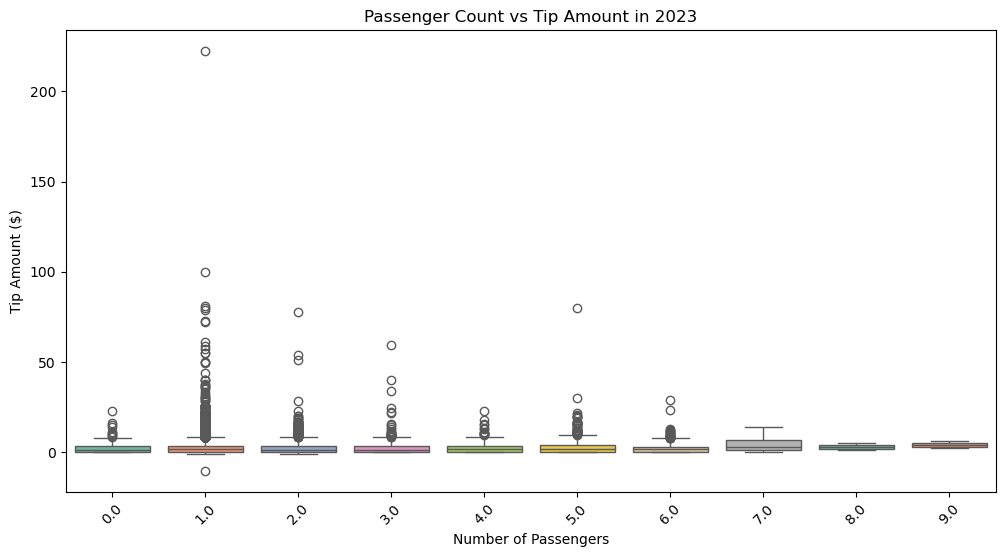

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1587/3462711851.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_type_name', y='tip_amount', data=df2_2023, palette='Set2')


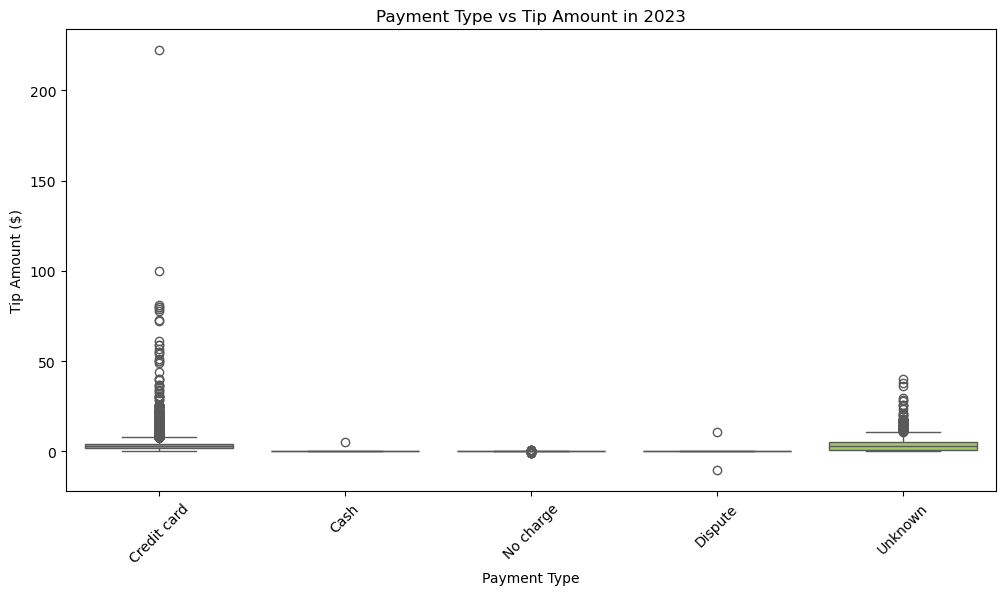

In [ ]:
# analisa korelasi Hubungan antara jumlah penumpang dan tip
plt.figure(figsize=(12, 6))
sns.boxplot(x='passenger_count', y='tip_amount', data=df2_2023, palette='Set2')
plt.title('Passenger Count vs Tip Amount in 2023')
plt.xlabel('Number of Passengers')
plt.ylabel('Tip Amount ($)')
plt.xticks(rotation=45)
plt.show()
# analisa korelasi antara metode pembayaran dan tip
plt.figure(figsize=(12, 6))
sns.boxplot(x='payment_type_name', y='tip_amount', data=df2_2023, palette='Set2')
plt.title('Payment Type vs Tip Amount in 2023')
plt.xlabel('Payment Type')
plt.ylabel('Tip Amount ($)')
plt.xticks(rotation=45)
plt.show()

Analisis Tip Amount:
1. Tip amount berdasarkan jumlah penumpang menunjukkan bahwa trip dengan satu penumpang cenderung memberikan tip yang lebih tinggi dibandingkan dengan trip dengan dua atau lebih penumpang.
2. Hal ini mungkin disebabkan oleh penumpang yang lebih cenderung memberikan tip ketika mereka merasa perjalanan mereka lebih pribadi dan nyaman.
3. Tip amount berdasarkan metode pembayaran menunjukkan bahwa pembayaran dengan kartu kredit cenderung memberikan tip yang lebih tinggi dibandingkan dengan pembayaran tunai.
4. Tipe pembayaran "No charge" dan "Dispute" tidak memberikan tip, yang sesuai dengan namanya.
5. Tipe trip "Street-hail" cenderung memberikan tip yang lebih tinggi dibandingkan dengan tipe trip "Dispatch".
6. Tipe trip "Unknown" tidak memberikan tip, yang mungkin disebabkan oleh ketidakjelasan dalam transaksi.


**# Penjelasan dan Rekomendasi: #**


1. Fare Amount:
   - Fare amount bervariasi tergantung pada metode pembayaran, jenis tarif, jumlah penumpang, dan jenis trip.
   - Rekomendasi: NYC TLC dapat mempertimbangkan untuk menyesuaikan tarif berdasarkan faktor-faktor ini, seperti memberikan diskon untuk pembayaran tunai atau menawarkan tarif khusus untuk trip dengan jumlah penumpang lebih dari dua.
2. Trip Duration:
   - Trip duration bervariasi tergantung pada jarak, kondisi lalu lintas, dan rute yang diambil.
   - Rekomendasi: NYC TLC dapat meningkatkan sistem navigasi dan perencanaan rute untuk mengurangi durasi trip, terutama pada jam sibuk.
3. Trip Distance:
   - Trip distance bervariasi tergantung pada lokasi penjemputan dan pengantaran, serta kondisi lalu lintas.
   - Rekomendasi: NYC TLC dapat mempertimbangkan untuk menawarkan opsi rute alternatif untuk trip jarak jauh, seperti menggunakan jalan tol atau rute yang lebih cepat.
4. Tip Amount:
   - Tip amount bervariasi tergantung pada jumlah penumpang, metode pembayaran, dan jenis trip.
   - Rekomendasi: NYC TLC dapat memberikan insentif bagi penumpang untuk memberikan tip, seperti program loyalitas atau diskon untuk trip berikutnya jika mereka memberikan tip yang baik.
5. Analisis lebih lanjut:
   - NYC TLC dapat melakukan analisis lebih lanjut untuk mengidentifikasi pola dan tren dalam data, seperti waktu dan lokasi trip yang paling sibuk, serta faktor-faktor yang mempengaruhi fare amount, trip duration, dan trip distance.
